# **1. Install Library**

In [1]:
# ! pip install mlxtend==0.21.0

In [2]:
import os
import random
import numpy as np
import tensorflow as tf

seed_value=100
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
import logging
import tensorflow as tf
tf.get_logger().setLevel(logging.ERROR)

# **2. Read Data**

## 2.1 unrar

In [5]:
# ! unrar x drive/MyDrive/Data_FastRNN.rar

## 2.2 read data main

In [6]:
import pandas as pd
data_main=pd.read_excel("data_fastrnn1.xlsx",header=[1],sheet_name='خبهمن')
data_main

,نماد,firm,date,تاریخ شمسی,داده ها از 90 تا 1400,اولين قيمت,بالاترين قيمت,كمترين قيمت,قيمت پاياني,ارزش معاملات,...,dps,eps,p_e,roa,size,شاخص کل,تورم,طلا,نفت,دلار
0,Bahman.Group,3,2011/03/02,1389/12/11,4406,2600,2669,2600,2665,10733900831,...,580,651,3.036855,0.121256,7.276641,NaN,NaN,NaN,125.070955,NaN
1,Bahman.Group,3,2011/03/05,1389/12/14,4407,2720,2771,2710,2760,34961612481,...,580,651,3.036855,0.121256,7.276641,NaN,NaN,NaN,125.446358,NaN
2,Bahman.Group,3,2011/03/06,1389/12/15,4408,2843,2843,2724,2820,54471566876,...,580,651,3.036855,0.121256,7.276641,NaN,NaN,NaN,125.822496,NaN
3,Bahman.Group,3,2011/03/07,1389/12/16,4409,2735,2755,2710,2725,16925994843,...,580,651,3.036855,0.121256,7.276641,NaN,NaN,NaN,126.199369,NaN
4,Bahman.Group,3,2011/03/08,1389/12/17,4410,2712,2834,2712,2806,32543743009,...,580,651,3.036855,0.121256,7.276641,NaN,NaN,NaN,126.576979,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,Bahman.Group,3,2022/03/13,1400/12/22,6665,1718,1719,1671,1697,115499280263,...,377,120,14.633333,0.099039,8.211562,1335376.4,30.096101,1.167731e+07,121.357388,42000.0
2260,Bahman.Group,3,2022/03/14,1400/12/23,6666,1673,1719,1673,1697,68603812293,...,377,120,14.633333,0.099039,8.211562,1334776.9,29.929022,1.167140e+07,122.463734,42000.0
2261,Bahman.Group,3,2022/03/15,1400/12/24,6667,1677,1761,1677,1737,119951932762,...,377,120,14.633333,0.099039,8.211562,1337223.2,29.761546,1.166546e+07,122.833988,42000.0
2262,Bahman.Group,3,2022/03/16,1400/12/25,6668,1781,1823,1781,1821,354320314840,...,377,120,14.633333,0.099039,8.211562,1345018.2,29.593672,1.165950e+07,123.204977,42000.0


# **3. Preproceesing Data**

In [8]:
data_main.isna().sum()

نماد                      0
firm                      0
date                      0
تاریخ شمسی                0
داده ها از 90 تا 1400     0
اولين قيمت                0
بالاترين قيمت             0
كمترين قيمت               0
قيمت پاياني               0
ارزش معاملات              0
حجم معاملات               0
قيمت پيش گشايش            0
قيمت اولي                 0
آخرين قيمت                0
MA(5)                     4
MA(12)                   11
MA(26)                   25
EMA(12)                   0
EMA(26)                   0
MACD                     25
RSI                      14
dps                       0
eps                       0
p_e                       0
roa                       0
size                      0
شاخص کل                  13
تورم                     15
طلا                      15
نفت                      15
دلار                     12
dtype: int64

In [43]:
data_main_pre=data_main.fillna(0)
data_main_pre['lbl']=data_main_pre['قيمت پاياني']
data_main_pre.drop(['date','نماد','firm','داده ها از 90 تا 1400','تاریخ شمسی','قيمت اولي'],axis=1,inplace=True)
data_main_pre.drop('قيمت پاياني',axis=1,inplace=True)
data_main_pre

,اولين قيمت,بالاترين قيمت,كمترين قيمت,ارزش معاملات,حجم معاملات,قيمت پيش گشايش,آخرين قيمت,MA(5),MA(12),MA(26),...,eps,p_e,roa,size,شاخص کل,تورم,طلا,نفت,دلار,lbl
0,2600,2669,2600,10733900831,4027793,161,2669,0.0,0.000000,0.000000,...,651,3.036855,0.121256,7.276641,0.0,0.000000,0.000000e+00,125.070955,0.0,2665
1,2720,2771,2710,34961612481,12666330,869,2771,0.0,0.000000,0.000000,...,651,3.036855,0.121256,7.276641,0.0,0.000000,0.000000e+00,125.446358,0.0,2760
2,2843,2843,2724,54471566876,19313495,600,2735,0.0,0.000000,0.000000,...,651,3.036855,0.121256,7.276641,0.0,0.000000,0.000000e+00,125.822496,0.0,2820
3,2735,2755,2710,16925994843,6211959,519,2713,0.0,0.000000,0.000000,...,651,3.036855,0.121256,7.276641,0.0,0.000000,0.000000e+00,126.199369,0.0,2725
4,2712,2834,2712,32543743009,11598108,690,2834,2744.4,0.000000,0.000000,...,651,3.036855,0.121256,7.276641,0.0,0.000000,0.000000e+00,126.576979,0.0,2806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,1718,1719,1671,115499280263,68077374,2032,1703,1756.4,1776.666667,1780.807692,...,120,14.633333,0.099039,8.211562,1335376.4,30.096101,1.167731e+07,121.357388,42000.0,1697
2260,1673,1719,1673,68603812293,40424412,1364,1691,1733.6,1762.833333,1773.769231,...,120,14.633333,0.099039,8.211562,1334776.9,29.929022,1.167140e+07,122.463734,42000.0,1697
2261,1677,1761,1677,119951932762,69057575,1831,1725,1730.0,1759.500000,1768.730769,...,120,14.633333,0.099039,8.211562,1337223.2,29.761546,1.166546e+07,122.833988,42000.0,1737
2262,1781,1823,1781,354320314840,194605032,2522,1823,1734.0,1763.916667,1770.115385,...,120,14.633333,0.099039,8.211562,1345018.2,29.593672,1.165950e+07,123.204977,42000.0,1821


In [44]:
data_final=data_main_pre

In [45]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
print("Original descriptives:")
display(data_final.describe().round(2))

print("\nMin-Max-scaled descriptives:")
scaler = MinMaxScaler(feature_range=(0,1)) #StandardScaler()  #
scaler.fit(data_final)
data_scaled = scaler.transform(data_final)
df_scaled = pd.DataFrame(data_scaled, index=data_final.index, columns=data_final.columns)
display(df_scaled.describe().round(2))
data_normal=df_scaled


Original descriptives:


,اولين قيمت,بالاترين قيمت,كمترين قيمت,ارزش معاملات,حجم معاملات,قيمت پيش گشايش,آخرين قيمت,MA(5),MA(12),MA(26),...,eps,p_e,roa,size,شاخص کل,تورم,طلا,نفت,دلار,lbl
count,2264.00,2264.00,2264.00,2.264000e+03,2.264000e+03,2264.00,2264.00,2264.00,2264.00,2264.00,...,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00
mean,1871.36,1903.90,1835.78,5.272385e+10,2.922103e+07,1092.50,1866.96,1862.95,1855.96,1841.20,...,341.49,7.01,0.12,7.35,214449.64,24.57,2991965.60,73.42,29336.11,1871.44
std,649.82,660.78,634.41,1.402071e+11,8.066827e+07,1703.33,647.97,645.15,642.65,640.28,...,142.71,12.31,0.03,0.29,369121.16,14.29,3445078.07,30.88,11216.79,648.13
min,721.00,760.00,720.00,1.834380e+06,1.161000e+03,2.00,720.00,0.00,0.00,0.00,...,120.00,3.04,0.09,7.20,0.00,0.00,0.00,0.00,0.00,739.00
25%,1404.00,1430.00,1374.50,3.734249e+09,2.178884e+06,220.00,1409.75,1411.25,1411.12,1405.56,...,207.00,3.47,0.10,7.21,61500.70,12.15,982958.06,50.01,24797.75,1406.75
50%,1866.00,1900.00,1830.00,1.083540e+10,6.465673e+06,500.00,1859.00,1855.00,1853.00,1854.73,...,375.00,5.06,0.11,7.26,77455.50,21.64,1176375.01,62.95,30196.00,1871.00
75%,2180.00,2210.25,2150.00,3.631820e+10,1.830575e+07,1198.50,2178.00,2176.35,2182.52,2192.62,...,425.00,5.66,0.13,7.29,158050.90,36.29,4440628.66,95.30,42000.00,2181.25
max,5596.00,5596.00,5542.00,2.461132e+12,1.444620e+09,18182.00,5596.00,5346.60,4812.67,4275.42,...,651.00,162.12,0.19,8.21,1575762.00,63.17,12334149.58,180.04,44120.00,5596.00



Min-Max-scaled descriptives:


,اولين قيمت,بالاترين قيمت,كمترين قيمت,ارزش معاملات,حجم معاملات,قيمت پيش گشايش,آخرين قيمت,MA(5),MA(12),MA(26),...,eps,p_e,roa,size,شاخص کل,تورم,طلا,نفت,دلار,lbl
count,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,...,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00,2264.00
mean,0.24,0.24,0.23,0.02,0.02,0.06,0.24,0.35,0.39,0.43,...,0.42,0.02,0.31,0.15,0.14,0.39,0.24,0.41,0.66,0.23
std,0.13,0.14,0.13,0.06,0.06,0.09,0.13,0.12,0.13,0.15,...,0.27,0.08,0.27,0.28,0.23,0.23,0.28,0.17,0.25,0.13
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.14,0.14,0.14,0.00,0.00,0.01,0.14,0.26,0.29,0.33,...,0.16,0.00,0.13,0.01,0.04,0.19,0.08,0.28,0.56,0.14
50%,0.23,0.24,0.23,0.00,0.00,0.03,0.23,0.35,0.39,0.43,...,0.48,0.01,0.23,0.06,0.05,0.34,0.10,0.35,0.68,0.23
75%,0.30,0.30,0.30,0.01,0.01,0.07,0.30,0.41,0.45,0.51,...,0.57,0.02,0.41,0.10,0.10,0.57,0.36,0.53,0.95,0.30
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [46]:
data_ready = data_normal.copy()
lbl_ready=data_normal.iloc[:,-1]

print("_"*50)
print("data_final shape: {0}".format(data_ready.shape))
print("lbl_final shape: {0}".format(lbl_ready.shape))
print("_"*50)

__________________________________________________
data_final shape: (2264, 25)
lbl_final shape: (2264,)
__________________________________________________


# **4. Visualization Data**

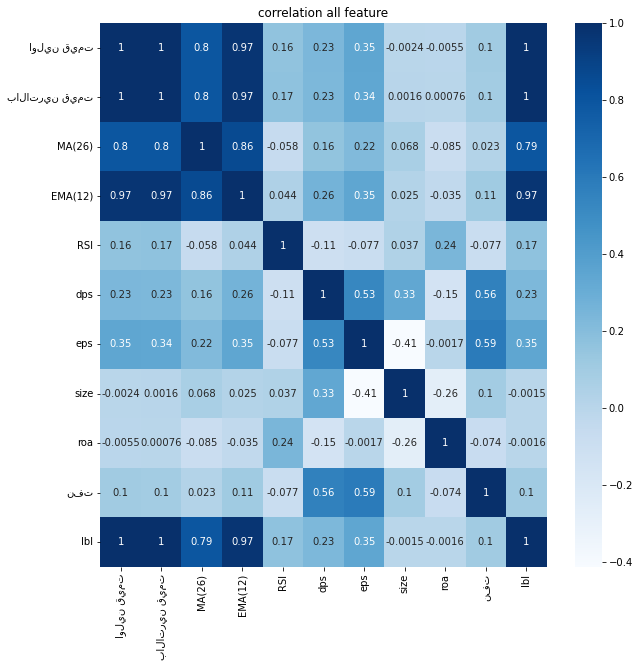

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
cor = data_ready.iloc[:,[0,1,9,10,13,14,15,18,17,22,-1]].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.title("correlation all feature")
plt.show()

In [48]:
import numpy as np
col_names=data_ready.columns
cor_abs=np.abs(cor.iloc[:,-1])
idx_sort=np.argsort(cor_abs)
sort_cor=np.round(cor_abs[idx_sort],4)
col_names_new=np.array(col_names)
col_names_sort=col_names_new[idx_sort]
for i, item in  enumerate(col_names_sort):
  print('number: {0} , colums: {1} cor: {2}'.format(i,item,sort_cor[i]))


number: 0 , colums: MA(5) cor: 0.0015
number: 1 , colums: MA(12) cor: 0.0016
number: 2 , colums: MA(26) cor: 0.1031
number: 3 , colums: حجم معاملات cor: 0.1712
number: 4 , colums: قيمت پيش گشايش cor: 0.233
number: 5 , colums: آخرين قيمت cor: 0.3464
number: 6 , colums: كمترين قيمت cor: 0.7938
number: 7 , colums: ارزش معاملات cor: 0.9699
number: 8 , colums: اولين قيمت cor: 0.9983
number: 9 , colums: بالاترين قيمت cor: 0.9991
number: 10 , colums: EMA(12) cor: 1.0


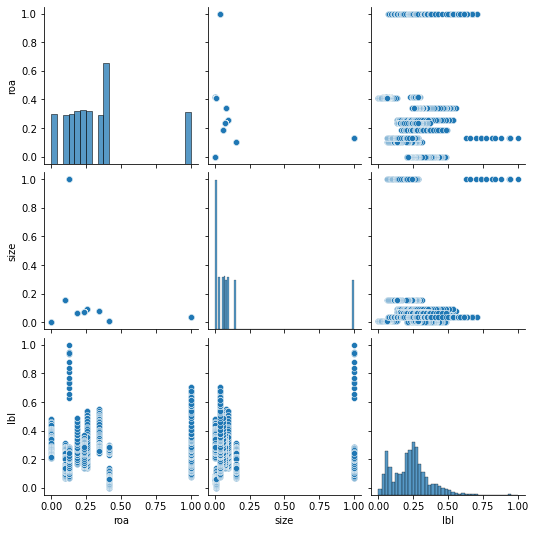

In [49]:
# importing packages
import seaborn
# pairplot with 
seaborn.pairplot(data_ready[['roa','size','lbl']])
# to show
plt.show()

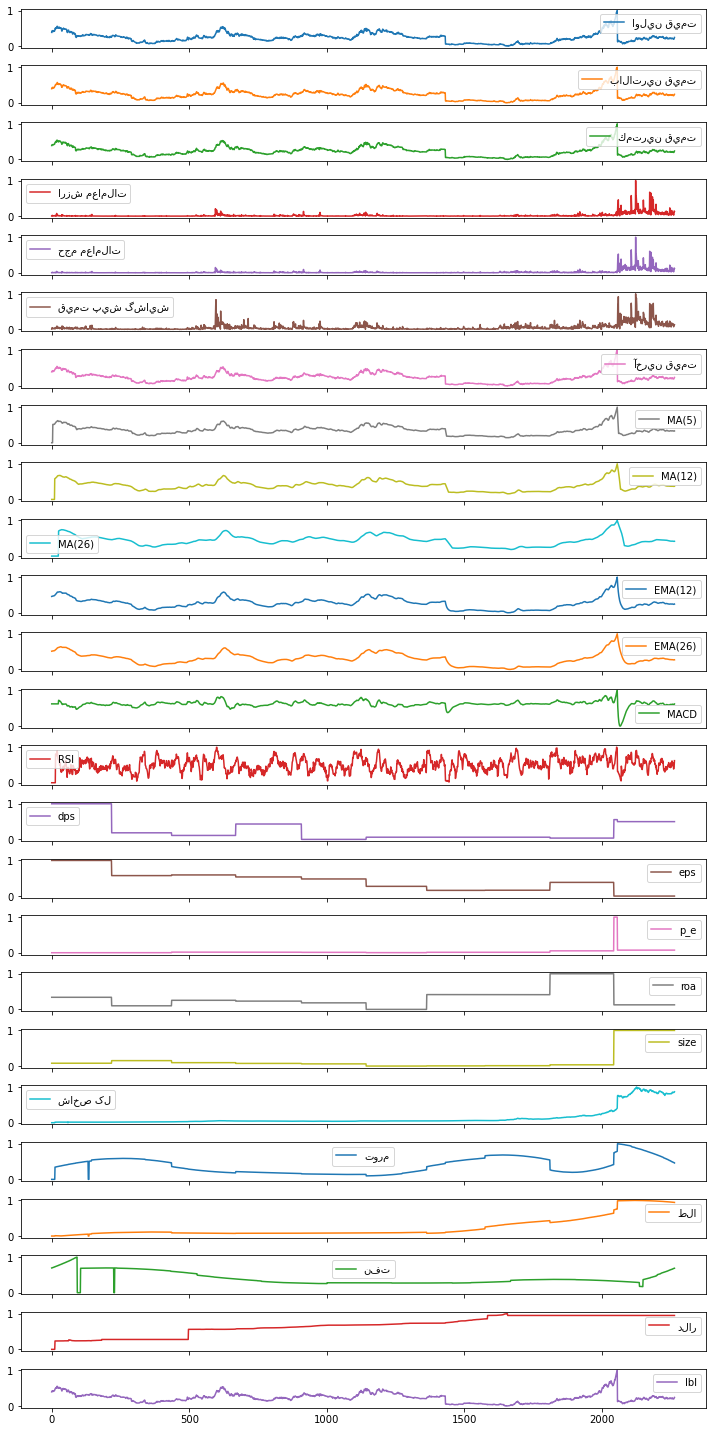

In [50]:
data_ready.plot(subplots=True,figsize=(10,20));
plt.tight_layout(); # <- this is often necessary when using subplots to avoid 

<Figure size 432x288 with 0 Axes>

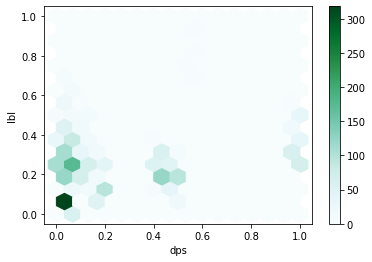

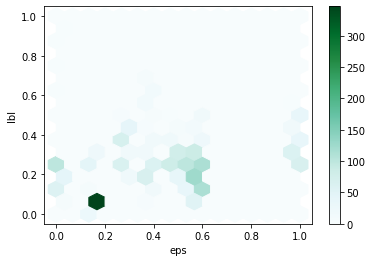

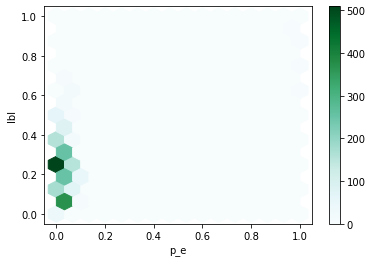

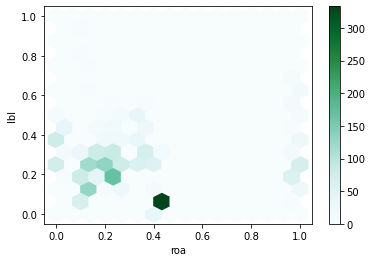

In [51]:
plt.figure()
data_ready.plot(kind="hexbin", x=data_ready.columns[14], y=data_ready.columns[-1], gridsize=15, sharex=False);
data_ready.plot(kind="hexbin", x=data_ready.columns[15], y=data_ready.columns[-1], gridsize=15, sharex=False);
data_ready.plot(kind="hexbin", x=data_ready.columns[16], y=data_ready.columns[-1], gridsize=15, sharex=False);
data_ready.plot(kind="hexbin", x=data_ready.columns[17], y=data_ready.columns[-1], gridsize=15, sharex=False);
plt.show()

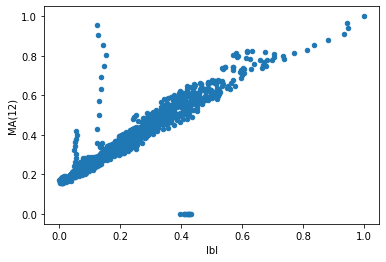

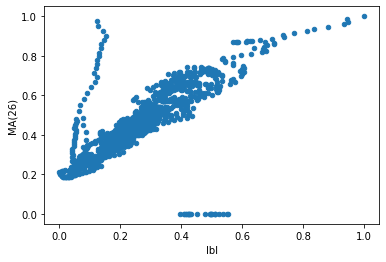

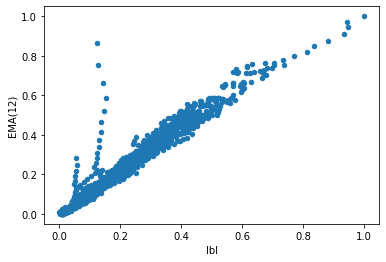

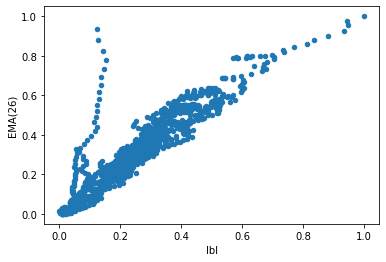

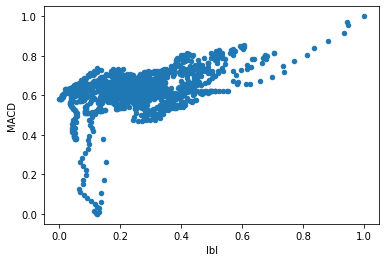

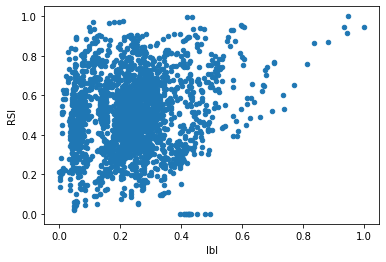

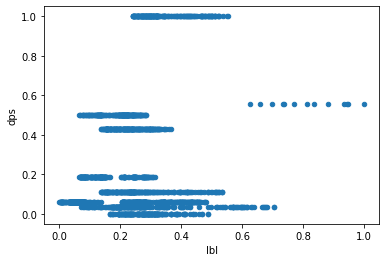

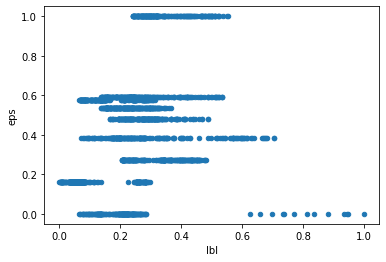

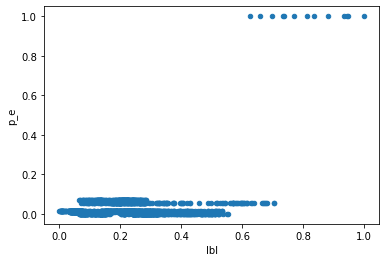

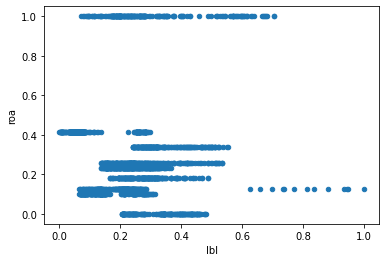

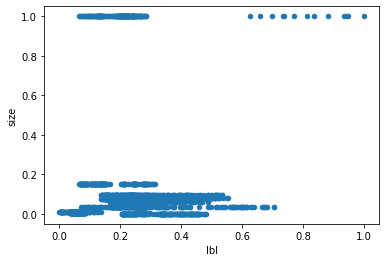

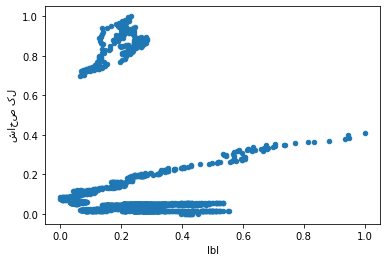

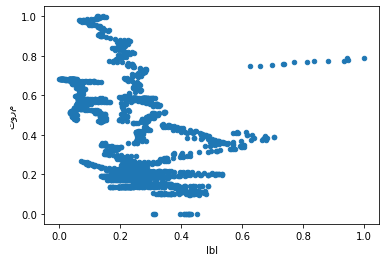

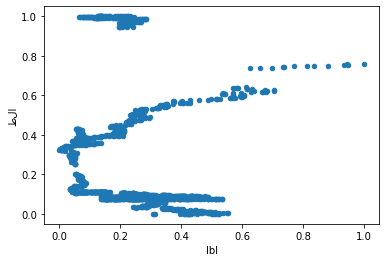

In [52]:
for i in range(8,22):
  data_ready.plot(data_ready.columns[-1], data_ready.columns[i], kind="scatter")

# **5. time window**

In [53]:
data_ready.columns

Index(['اولين قيمت', 'بالاترين قيمت', 'كمترين قيمت', 'ارزش معاملات',
       'حجم معاملات', 'قيمت پيش گشايش', 'آخرين قيمت', 'MA(5)', 'MA(12)',
       'MA(26)', 'EMA(12)', 'EMA(26)', 'MACD', 'RSI', 'dps', 'eps', 'p_e',
       'roa', 'size', 'شاخص کل', 'تورم', 'طلا', 'نفت', 'دلار', 'lbl'],
      dtype='object')

In [54]:
n_batch=32
feature_input_FastRNN=data_ready.columns.tolist()
feature_out_FastRNN=['lbl']
n_sequence=7

In [55]:
import numpy as np

def multivariate_win(dataset, target, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []
    start_index=0
    end_index = None
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)




In [56]:
STEP =1
n_step=1
past_history = n_sequence
index_precentage = -1

data_can,lbl_candel=multivariate_win(data_ready[feature_input_FastRNN].values,
                                            data_ready[feature_out_FastRNN].values,
                                            past_history,
                                            n_step, STEP,
                                            single_step=True)
print("_"*50)
print('-> data_can  shape = {0}'.format(data_can.shape))
print('-> lbl shape = {0}'.format(lbl_candel.shape))
print("_"*50)


__________________________________________________
-> data_can  shape = (2256, 7, 25)
-> lbl shape = (2256, 1)
__________________________________________________


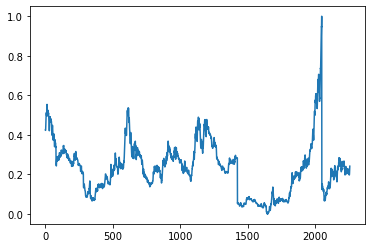

In [57]:
plt.plot(lbl_candel)
plt.show()

# **6. Train test split**

In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_can , lbl_candel, test_size=0.10,shuffle=False, random_state=42)
print("", X_train.shape, "\n", y_train.shape, 
      "\n", X_test.shape, "\n", y_test.shape)

 (2030, 7, 25) 
 (2030, 1) 
 (226, 7, 25) 
 (226, 1)


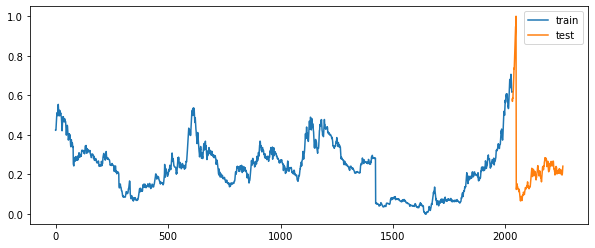

In [59]:
plt.figure(figsize=(10,4))
plt.plot(range(len(y_train)),y_train)
plt.plot(range(len(y_train),len(y_train)+len(y_test)),y_test)
plt.legend(['train','test'])
plt.show()

In [60]:
def fun_pre(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} )".format(pct, absolute)


def plot_pie(values,hlabels,uexplode=[0,0.1],my_color=["red","blue"]):
    plt.pie(values, 
            labels =hlabels,
            explode=uexplode,
            colors=my_color,
            autopct = lambda pct: fun_pre(pct, values))
    plt.legend()
    plt.show() 

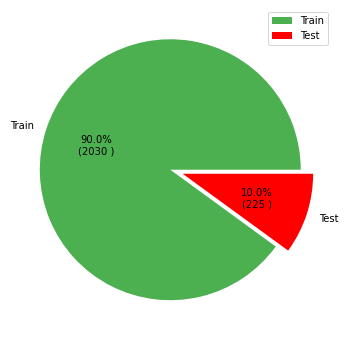

In [61]:
import matplotlib.pyplot as plt
import numpy as np
hlabels=["Train","Test"]
mycolors = [ "#4CAF50","red","blue","#0CFFF0"]

class1=X_train.shape[0]
class2=X_test.shape[0]


values=[class1,class2]
plt.figure(figsize=(6,6))
plt.title("",fontsize=14)
plot_pie(values,hlabels,[0,0.1],mycolors)
plt.show()

# **7.Horse herd optimization algorithm**

In [62]:
import numpy as np

def shpere(x):
    z=np.array(x)
    z=np.sum(x**2)
    return z


## 6.1 base code 

In [63]:
class Particle():
  def __init__(self):
          self.Position=[]
          self.Cost=[]
          self.Velocity=[]
          self.Best=[]

In [64]:
def HOA(nHourse,nVar,VarMin,VarMax,VarSize,CostFunction,MaxIt):

  w=1;
  phiD=0.02;
  phiI=0.02;


  g_Alpha=1.50;       #Grazing
  d_Alpha=0.5;        #Defense Mechanism
  h_Alpha=1.5;        #Hierarchy

  g_Beta=1.50;       # Grazing
  h_Beta=0.9;        #Hierarchy 
  s_Beta=0.20;       #Sociability
  d_Beta=0.20;       #Defense Mechanism

  g_Gamma=1.50;      #Grazing 
  h_Gamma=0.50;      #Hierarchy 
  s_Gamma=0.10;      #Sociability 
  i_Gamma=0.30;      #Imitation
  d_Gamma=0.10;      #Defense Mechanism 
  r_Gamma=0.05;      #Random (Wandering and Curiosity)

  g_Delta=1.50;      #Grazing
  r_Delta=0.10;      #Random (Wandering and Curiosity) 

  # Velocity limits
  VelMax = 0.3 * (VarMax - VarMin)
  VelMin = -VelMax



  Hourse = [Particle() for _ in range(nHourse)]
  GlobalBest=Particle()
  GlobalBest.Cost=np.inf;
  CostPositionCounter=np.zeros((nHourse,2+nVar));


  for i in range(nHourse):
      #Initialize Position
      Hourse[i].Position=np.random.uniform(VarMin, VarMax,VarSize)[0]
      #Initialize Velocity
      Hourse[i].Velocity=np.zeros(VarSize)

      #Evaluation
      Hourse[i].Cost= CostFunction(Hourse[i].Position);
      #Update Personal Best
      Hourse[i].Best=deepcopy(Hourse[i])

      #Update Global Best
      if Hourse[i].Best.Cost<GlobalBest.Cost:
          GlobalBest=Hourse[i].Best;  
      ans=[i, Hourse[i].Best.Cost]
      ans.extend(Hourse[i].Best.Position.tolist())
      CostPositionCounter[i,:]=ans;

  BestCost = np.zeros((MaxIt, 1))

  #%%  Main Loop
  for it in range(MaxIt):
    CostPositionCounter=CostPositionCounter[CostPositionCounter[:, 1].argsort()]
    MeanPosition=np.mean(CostPositionCounter[0:nHourse,2:],axis=0);
    BadPosition=np.mean(CostPositionCounter[int((1-phiD)*nHourse):nHourse,2:],axis=0);
    GoodPosition=np.mean(CostPositionCounter[1:int(phiI*nHourse),2:],axis=0);
    for i in range(nHourse):
      CC=np.argwhere(CostPositionCounter[:,0]==i)[0][0]
      # Update Velocity
      if CC<=0.1*nHourse:
        Hourse[i].Velocity = h_Alpha*rand(VarSize[1])*(GlobalBest.Position-Hourse[i].Position)\
        -d_Alpha*rand(VarSize[1])*(Hourse[i].Position)\
        +g_Alpha*(0.95+0.1*rand())*(Hourse[i].Best.Position-Hourse[i].Position)
                
      elif CC<=0.3*nHourse:
        Hourse[i].Velocity = s_Beta*rand(VarSize[1])*(MeanPosition-Hourse[i].Position)\
            -d_Beta*rand(VarSize[1])*(BadPosition-Hourse[i].Position)\
            +h_Beta*rand(VarSize[1])*(GlobalBest.Position-Hourse[i].Position)\
            +g_Beta*(0.95+0.1*rand())*(Hourse[i].Best.Position-Hourse[i].Position)
          
      elif CC<=0.6*nHourse:
        Hourse[i].Velocity = s_Gamma*rand(VarSize[1])*(MeanPosition-Hourse[i].Position)\
        +r_Gamma*rand(VarSize[1])*(Hourse[i].Position)\
        -d_Gamma*rand(VarSize[1])*(BadPosition-Hourse[i].Position)\
        +h_Gamma*rand(VarSize[1])*(GlobalBest.Position-Hourse[i].Position)\
        +i_Gamma*rand(VarSize[1])*(GoodPosition-Hourse[i].Position)\
        +g_Gamma*(0.95+0.1*rand())*(Hourse[i].Best.Position-Hourse[i].Position);
          
          
      else:
        Hourse[i].Velocity = +r_Delta*rand(VarSize[1])*(Hourse[i].Position)\
        +g_Delta*(0.95+0.1*rand())*(Hourse[i].Best.Position-Hourse[i].Position);

      # Apply Velocity Limits
      Hourse[i].Velocity = np.maximum(Hourse[i].Velocity,VelMin);
      Hourse[i].Velocity = np.minimum(Hourse[i].Velocity,VelMax); 

      # Update Position
      Hourse[i].Position = Hourse[i].Position + Hourse[i].Velocity;
      
      # Velocity Mirror Effect
      IsOutside=(np.less(Hourse[i].Position, VarMin)\
                  | np.greater(Hourse[i].Position, VarMax))
      # IsOutside=IsOutside.reshape(1,-1)    
      Hourse[i].Velocity[IsOutside]=-Hourse[i].Velocity[IsOutside];
      
      # Apply Position Limits
      Hourse[i].Position = np.maximum(Hourse[i].Position,VarMin);
      Hourse[i].Position = np.minimum(Hourse[i].Position,VarMax);

      # Evaluation
      Hourse[i].Cost= CostFunction(Hourse[i].Position);  

      # Update Personal Best
      if Hourse[i].Cost<Hourse[i].Best.Cost:
          Hourse[i].Best.Position=Hourse[i].Position;
          Hourse[i].Best.Cost=Hourse[i].Cost;
          # Update Global Best
          if Hourse[i].Best.Cost<GlobalBest.Cost:     
              GlobalBest=deepcopy(Hourse[i].Best);
    BestCost[it] = GlobalBest.Cost
    
    print(' , Iteration = '+ str(it)+\
              ', Best Cost = '+str(np.round(BestCost[it][0],4)))
    
    d_Alpha=d_Alpha*w; g_Alpha=g_Alpha*w;
    d_Beta=d_Beta*w; s_Beta=s_Beta*w; g_Beta=g_Beta*w;
    d_Gamma=d_Gamma*w; s_Gamma=s_Gamma*w
    r_Gamma=r_Gamma*w; i_Gamma=i_Gamma*w;
    g_Gamma=g_Gamma*w;
    r_Delta=r_Delta*w; g_Delta=g_Delta*w;
  return GlobalBest
    



## 6.2 Test 

In [65]:
from copy import copy, deepcopy
from numpy.random import rand
nHourse=10
nVar=10
VarMin = np.ones(nVar)*-100 # Lower bound of variables
VarMax = np.ones(nVar)*100 # Upper bound of variables
VarSize = (1, nVar) 
CostFunction=shpere;
MaxIt=10
best_sol=HOA(nHourse,nVar,VarMin,VarMax,VarSize,CostFunction,MaxIt)


 , Iteration = 0, Best Cost = 4676.3641
 , Iteration = 1, Best Cost = 1624.3413
 , Iteration = 2, Best Cost = 365.9522
 , Iteration = 3, Best Cost = 114.4049
 , Iteration = 4, Best Cost = 65.8838
 , Iteration = 5, Best Cost = 29.6545
 , Iteration = 6, Best Cost = 2.8477
 , Iteration = 7, Best Cost = 1.7408
 , Iteration = 8, Best Cost = 0.2954
 , Iteration = 9, Best Cost = 0.1684


C:\Users\programmer\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\programmer\AppData\Roaming\Python\Python39\site-packages\numpy\core\_methods.py:180: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [66]:
best_sol.Position

array([ 0.33692365, -0.05703405,  0.14828669, -0.08152671, -0.00087345,
       -0.06965448,  0.01386016,  0.03697494,  0.06187198,  0.11275076])

# **8.Spotted Hyena Optimizer**

In [67]:
import numpy as np

def shpere(x):
    z=np.array(x)
    z=np.sum(x**2)
    return z


In [68]:
def noh(best_hyena_fitness):
  min = 0.5;
  max = 1;
  count=0;
  M=(max-min)*rand() + min;
  M=M+best_hyena_fitness[0];

  for i in range(1,len(best_hyena_fitness)):
      if M>=best_hyena_fitness[i]:
        count=count+1;
  X=count;
  del count
  del M
  count=0;
  return X
  

## 7.1 base code 

In [69]:
import math
from numpy.random import rand

def SHO(N,nVar,lowerbound,upperbound,dimension,fitness,Max_iterations):

  # Initialize the hyena_pos of search agents
  hyena_pos = np.zeros((N, dimension))
  for i in range(N):
      #Initialize Position
      hyena_pos[i]=np.random.uniform(lowerbound, upperbound,dimension)

      
  Convergence_curve = np.zeros(Max_iterations)
  hyena_fitness=np.ones(N)*math.inf 


  #%%  Main Loop
  for Iteration in range(1,Max_iterations+1):
    for i in range(N):
      # Check boundries
      # FU=hyena_pos[i]>upperbound;
      # FL=hyena_pos[i]<lowerbound;
      # hyena_pos[i]=(hyena_pos[i]*(np.logical_not(FU+FL)))+FU*upperbound+FL*lowerbound
      # Apply  Limits
      hyena_pos[i] = np.maximum(hyena_pos[i],lowerbound);
      hyena_pos[i]= np.minimum(hyena_pos[i],upperbound); 

      hyena_fitness[i]=fitness(hyena_pos[i]);  


    if Iteration==1:
      idx_sort=np.argsort(hyena_fitness)
      fitness_sorted=hyena_fitness[idx_sort]
      sorted_population=hyena_pos[idx_sort].copy()
      best_hyenas=sorted_population.copy()
      best_hyena_fitness=fitness_sorted.copy()
    else:
      double_population=np.concatenate((pre_population,best_hyenas),axis=0);
      double_fitness=np.concatenate((pre_fitness,best_hyena_fitness),axis=0);
      idx_sort=np.argsort(double_fitness)
      double_fitness_sorted=double_fitness[idx_sort].copy()
      double_sorted_population=double_population[idx_sort].copy()
      fitness_sorted=double_fitness_sorted[0:N].copy()
      sorted_population=double_sorted_population[0:N].copy()
      best_hyenas=sorted_population.copy()
      best_hyena_fitness=fitness_sorted.copy()

    NOH=1+noh(best_hyena_fitness);
    Best_hyena_score=fitness_sorted[0].copy();
    Best_hyena_pos=sorted_population[0].copy();
    pre_population=hyena_pos.copy();
    pre_fitness=hyena_fitness.copy();
    
    a=5-Iteration*((5)/Max_iterations);
    HYE=0;
    CV=0;
    for i in range(N):
      for j in range(dimension):
        for k in range(NOH):
          HYE=0;
          r1=rand();
          r2=rand(); 
          Var1=2*a*r1-a; 
          Var2=2*r2; 
          distance_to_hyena=np.abs(Var2*sorted_population[k,j]-hyena_pos[i,j]);
          HYE=sorted_population[k,j]-Var1*distance_to_hyena;
          CV=CV+HYE;        
          distance_to_hyena=0;
        CV=np.array(CV)     
        hyena_pos[i,j]=(CV/(NOH+1));
        CV=0;
      
    Convergence_curve[Iteration-1]=Best_hyena_score;
    print(' , Iteration = '+ str(Iteration)+\
              ', Best Cost = '+str(np.round(Convergence_curve[Iteration-1],4)))
  return Best_hyena_pos,Best_hyena_score

## 7.2 Test 

In [70]:
from copy import copy, deepcopy
from numpy.random import rand
N=10
Max_iterations=10
dimension=10
lowerbound=np.ones(dimension)*-100 # Lower bound of variables
upperbound=np.ones(dimension)*100 # Lower bound of variables
fitness=shpere

best_Position,best_cost=SHO(N,nVar,lowerbound,upperbound,dimension,fitness,Max_iterations)


 , Iteration = 1, Best Cost = 26795.8466
 , Iteration = 2, Best Cost = 26795.8466
 , Iteration = 3, Best Cost = 8519.6039
 , Iteration = 4, Best Cost = 8519.6039
 , Iteration = 5, Best Cost = 8519.6039
 , Iteration = 6, Best Cost = 5307.0514
 , Iteration = 7, Best Cost = 5082.1395
 , Iteration = 8, Best Cost = 1797.1622
 , Iteration = 9, Best Cost = 1797.1622
 , Iteration = 10, Best Cost = 442.0471


# **9.FastRNN**

## 9.1 Main code 

In [71]:
from tensorflow.python.ops import math_ops
from tensorflow.python.ops import gen_math_ops
from tensorflow.keras import backend as K
from keras import backend
import tensorflow as tf


def gen_non_linearity(A, non_linearity):
    '''
    Returns required activation for a tensor based on the inputs

    non_linearity is either a callable or a value in
        ['tanh', 'sigmoid', 'relu', 'quantTanh', 'quantSigm', 'quantSigm4']
    '''
    if non_linearity == "tanh":
        return math_ops.tanh(A)
    elif non_linearity == "sigmoid":
        return math_ops.sigmoid(A)
    elif non_linearity == "relu":
        return gen_math_ops.maximum(A, 0.0)
    elif non_linearity == "quantTanh":
        return gen_math_ops.maximum(gen_math_ops.minimum(A, 1.0), -1.0)
    elif non_linearity == "quantSigm":
        A = (A + 1.0) / 2.0
        return gen_math_ops.maximum(gen_math_ops.minimum(A, 1.0), 0.0)
    elif non_linearity == "quantSigm4":
        A = (A + 2.0) / 4.0
        return gen_math_ops.maximum(gen_math_ops.minimum(A, 1.0), 0.0)
    else:
        # non_linearity is a user specified function
        if not callable(non_linearity):
            raise ValueError("non_linearity is either a callable or a value " +
                             + "['tanh', 'sigmoid', 'relu', 'quantTanh', " +
                             "'quantSigm'")
        return non_linearity(A)

def gen_non_linearity_keras(A, non_linearity):
    '''
    Returns required activation for a tensor based on the inputs

    non_linearity is either a callable or a value in
        ['tanh', 'sigmoid', 'relu', 'quantTanh', 'quantSigm', 'quantSigm4']
    '''
    if non_linearity == "tanh":
        return K.tanh(A)
    elif non_linearity == "sigmoid":
        return K.sigmoid(A)
    elif non_linearity == "relu":
        return K.maximum(A, 0.0)
    elif non_linearity == "quantTanh":
        return K.maximum(K.minimum(A, 1.0), -1.0)
    elif non_linearity == "quantSigm":
        A = (A + 1.0) / 2.0
        return K.maximum(K.minimum(A, 1.0), 0.0)
    elif non_linearity == "quantSigm4":
        A = (A + 2.0) / 4.0
        return K.maximum(K.minimum(A, 1.0), 0.0)
    else:
        # non_linearity is a user specified function
        if not callable(non_linearity):
            raise ValueError("non_linearity is either a callable or a value " +
                             + "['tanh', 'sigmoid', 'relu', 'quantTanh', " +
                             "'quantSigm'")
        return non_linearity(A)

In [72]:
from keras.layers import RNN
from keras import backend
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.initializers import RandomNormal, Constant, Ones


class FastRNNCell(keras.layers.Layer):

    def __init__(self, units, update_non_linearity="tanh",
                 wRank=None, uRank=None, alphaInit=-3.0, betaInit=3.0,
                 name="FastRNN", reuse=None,
                 **kwargs):
        self._hidden_size = units
        self.state_size = units
        self._update_non_linearity =update_non_linearity
        self._num_weight_matrices = [1, 1]
        self._wRank = wRank
        self._uRank = uRank
        self._alphaInit = alphaInit
        self._betaInit =betaInit
        if self._wRank is not None:
            self._num_weight_matrices[0] += 1
        if self._uRank is not None:
            self._num_weight_matrices[1] += 1
        self._name =name
        self.units = units
        self.state_size = units
        self.U=None
        super(FastRNNCell, self).__init__(**kwargs)
    
    def build(self, input_shape):
        input_dim = input_shape[-1]
        if self._wRank is None:
            W_matrix_init = RandomNormal(0,0.1)
            self.W = self.add_weight(
                shape=(input_dim, self._hidden_size),
                name='W',
                initializer=W_matrix_init)
        else:
            W_matrix_1_init = RandomNormal(0,0.1)
            self.W1 = self.add_weight(
                shape=(input_dim, self._wRank),
                name='W1',
                initializer=W_matrix_1_init)
            W_matrix_2_init = RandomNormal(0,0.1)
            self.W2 = self.add_weight(
                shape=(self._wRank, self._hidden_size),
                name='W2',
                initializer=W_matrix_2_init)

        if self._uRank is None:
            U_matrix_init = RandomNormal(0,0.1)
            self.U = self.add_weight(
                shape=(self._hidden_size, self._hidden_size),
                name='U',
                initializer=U_matrix_init)
        else:
            U_matrix_1_init = RandomNormal(0,0.1)
            self.U1 = self.add_weight(
                shape=(self._hidden_size, self._uRan),
                name='U1',
                initializer=U_matrix_1_init)
            U_matrix_2_init = RandomNormal(0,0.1)
            self.U2 = self.add_weight(
                shape=(self._uRank, self._hidden_size),
                name='U2',
                initializer=U_matrix_2_init)

        alpha_init = Constant(self._alphaInit)
        self.alpha = self.add_weight(
            shape=(1,1),
            name='alpha',
            initializer=alpha_init)

        beta_init = Constant(self._betaInit)
        self.beta = self.add_weight(
            shape=(1,1),
            name='beta',
            initializer=beta_init) 
        bias_update_init = Ones()
        self.bias_update = self.add_weight(
            shape=(1, self._hidden_size),
            name='B_h',
            initializer=bias_update_init)
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        if self._wRank is None:
            wComp = K.dot(inputs, self.W)
        else:
            wComp = K.dot(
                K.dot(inputs, self.W1), self.W2)

        if self._uRank is None:
            uComp = K.dot(states[0], self.U)
        else:
            uComp = K.dot(
                K.dot(states[0], self.U1), self.U2)

        pre_comp = wComp + uComp

        c = gen_non_linearity_keras(
            pre_comp + self.bias_update, self._update_non_linearity)

        new_h = K.sigmoid(self.beta) * \
            states[0] + K.sigmoid(self.alpha) * c
        return new_h, [new_h]



## 9.2  Default FastRNN

In [73]:
# from tensorflow.keras.layers import Dense, Input, RNN
from tensorflow import keras
def create_FastRNN_Base(data):
  fatrnn1=FastRNNCell(units=32, update_non_linearity="relu", alphaInit=-3.0, betaInit=3,
                 name="fast_rnn_1")
  fatrnn2=FastRNNCell(units=32, update_non_linearity="relu", alphaInit=-3.0, betaInit=3,
                 name="fast_rnn_2")
  input_layer=keras.layers.Input(shape=(data.shape[1:]),name="input_layer")
  x=keras.layers.RNN(fatrnn1, return_sequences=True, name='fast_cell_1')(input_layer)
  x=keras.layers.RNN(fatrnn2, return_sequences=True, name='fast_cell_2')(x)
  x = keras.layers.GlobalMaxPool1D()(x)
  x = keras.layers.Dense(50, activation='relu')(x)
  x = keras.layers.Dropout(0.1)(x)
  out= keras.layers.Dense(1)(x)
  model_base_FastRNN = keras.Model(inputs=input_layer, outputs = out)
  # setting optimizer and loss
  optimizerr = keras.optimizers.Adam(learning_rate=0.001)
  # compile model
  model_base_FastRNN.compile(optimizer=optimizerr,loss="mse")
  return model_base_FastRNN
model_base_FastRNN=create_FastRNN_Base(X_train)
model_base_FastRNN.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 25)]           0         
                                                                 
 fast_cell_1 (RNN)           (None, 7, 32)             3682      
                                                                 
 fast_cell_2 (RNN)           (None, 7, 32)             4130      
                                                                 
 global_max_pooling1d_2 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_5 (Dense)             (None, 50)                1650      
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                           

## 9.3 Fianl FastRNN

In [74]:
def get_new_fast_layer(uint,active,alpha,beta,name):
  return FastRNNCell(units=uint, 
                      update_non_linearity=active, 
                      alphaInit=alpha, 
                      betaInit=beta,
                  name=name)

In [75]:
from tensorflow import keras
def ceate_fast_rnn(data,dict_fast):
  input_layer=keras.layers.Input(shape=(data.shape[1:]),name="input_layer")
  fastRNN1=get_new_fast_layer(dict_fast['units1'],
                     dict_fast['active1'],
                     dict_fast['alpha1'],
                     dict_fast['beta1'],'fastRNN_1')
  fastRNN2=get_new_fast_layer(dict_fast['units2'],
                     dict_fast['active2'],
                     dict_fast['alpha2'],
                     dict_fast['beta2'],'fastRNN_2')
  fastRNN3=get_new_fast_layer(dict_fast['units3'],
                     dict_fast['active3'],
                     dict_fast['alpha3'],
                     dict_fast['beta3'],'fastRNN_3')
  
  
  x=keras.layers.RNN(fastRNN1, return_sequences=True,name='fastRNN_1')(input_layer)
  if(dict_fast['use_layer2'] ):
    x=keras.layers.RNN(fastRNN2, return_sequences=True,name='fastRNN_2')(x)
  if(dict_fast['use_layer3'] ):
    x=keras.layers.RNN(fastRNN3, return_sequences=True,name='fastRNN_3')(x)

  if(dict_fast['use_batchnorm'] ):
    x=keras.layers.BatchNormalization()(x)
  # x = keras.layers.GlobalMaxPool1D()(x)
  x = keras.layers.GlobalMaxPool1D()(x)
  x = keras.layers.Dense(dict_fast['dense1'], activation='relu')(x)
  x = keras.layers.Dense(dict_fast['dense2'], activation='relu')(x)
  x = keras.layers.Dropout(dict_fast['drop'])(x)
  out= keras.layers.Dense(1)(x)
  model = keras.Model(inputs=input_layer, outputs = out)
  # setting optimizer and loss
  optimizerr = keras.optimizers.Adam(learning_rate=0.001)
  # compile model
  model.compile(optimizer=optimizerr,loss="mse")
  return model





In [76]:
dict_fast=dict()
dict_fast['use_layer2']  =True
dict_fast['use_layer3']  =True
dict_fast['use_batchnorm']   =True
dict_fast['units1']  =32
dict_fast['active1'] ='relu'
dict_fast['alpha1']  =-1.0
dict_fast['beta1']   =1.0
dict_fast['units2']  =32
dict_fast['active2'] ='relu'
dict_fast['alpha2']  =-3.0
dict_fast['beta2']   =3.0
dict_fast['units3']  =32
dict_fast['active3'] ='relu'
dict_fast['alpha3']  =-3.0
dict_fast['beta3']   =3.0
dict_fast['dense1']   =200
dict_fast['dense2']   =200
dict_fast['drop']   =0.1
model=ceate_fast_rnn(X_train,dict_fast)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 25)]           0         
                                                                 
 fastRNN_1 (RNN)             (None, 7, 32)             3682      
                                                                 
 fastRNN_2 (RNN)             (None, 7, 32)             4130      
                                                                 
 fastRNN_3 (RNN)             (None, 7, 32)             4130      
                                                                 
 batch_normalization_1 (Batc  (None, 7, 32)            128       
 hNormalization)                                                 
                                                                 
 global_max_pooling1d_3 (Glo  (None, 32)               0         
 balMaxPooling1D)                                          

# **10. Optimal FastRNN**

## 10.1 train and validation

In [77]:
from sklearn.model_selection import train_test_split

XX_train, XX_vali, yy_train, yy_vali = train_test_split(X_train , y_train, test_size=0.20,shuffle=False, random_state=42)
print("", XX_train.shape, "\n", yy_train.shape, 
      "\n", XX_vali.shape, "\n", yy_vali.shape)

 (1624, 7, 25) 
 (1624, 1) 
 (406, 7, 25) 
 (406, 1)


## 10.2 Define parameter optimal

In [79]:
array_active=['tanh', 'sigmoid', 'relu', 'quantTanh']
array_units_rnn=[ 2**item for item in range(2,11)]
array_drop=[ item/100 for item in range(0,100,3)]
array_units_dense=[ 2**item for item in range(0,12)]
array_use=[False,True]
array_units_dense

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

In [80]:
lb=np.zeros(18)
ub=np.zeros(18)
lb[0]=0;ub[0]=1;   # 0 : use_layer2: True, False : 0-1
lb[1]=0;ub[1]=1;   # 1 : use_layer3: True, False : 0-1
lb[2]=0;ub[2]=1;   # 2 : use_batchnorm: True, False : 0-1

lb[3]=0;ub[3]=8;   # 3 : units1: [4, 8, 16, 32, 64, 128, 256, 512, 1024] : 0-9
lb[4]=0;ub[4]=3;   # 4 : active1: ['relu','sigmoid','elu','tanh'] : 0-4
lb[5]=-10;ub[5]=0; # 5 : alpha1: [-10....0] : (-10,0)
lb[6]=0;ub[6]=10;  # 6 : beta1: [0....10] : (0,10)

lb[7]=0;ub[7]=8;   # 7 : units2: [4, 8, 16, 32, 64, 128, 256, 512, 1024] : 0-9
lb[8]=0;ub[8]=3;   # 8 : active2: ['relu','sigmoid','elu','tanh'] : 0-4
lb[9]=-10;ub[9]=0; # 9 : alpha2: [-10....0] : (-10,0)
lb[10]=0;ub[10]=10;# 10 : beta2: [0....10] : (0,10)

lb[11]=0;ub[11]=9;   # 11 : units3: [4, 8, 16, 32, 64, 128, 256, 512, 1024] : 0-9
lb[12]=0;ub[12]=3;   # 12 : active3: ['relu','sigmoid','elu','tanh'] : 0-4
lb[13]=-10;ub[13]=0; # 13 : alpha3: [-10....0] : (-10,0)
lb[14]=0;ub[14]=10;  # 14 : beta3: [0....10] : (0,10)

lb[15]=0;ub[15]=11;  # 15 : dense1: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048] : 0-12
lb[16]=0;ub[16]=11;  # 16 : dense2: [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048] : 0-12
lb[17]=0;ub[17]=33;  # 17 : drop: [0.0, 0.03, 0.06, 0.09,.....0.93, 0.96, 0.99] : 0-34


## 10.3 fitness

In [81]:
def int_round(x):
  return np.int32(np.round(x))

In [82]:
def fitness(x):

  try:
    dict_fast=dict()
    dict_fast['use_layer2']      =array_use[int_round(x[0])]
    dict_fast['use_layer3']      =array_use[int_round(x[1])]
    dict_fast['use_batchnorm']   =array_use[int_round(x[2])]
    dict_fast['units1']          =array_units_rnn[int_round(x[3])]
    dict_fast['active1']         =array_active[int_round(x[4])]
    dict_fast['alpha1']    =np.round(x[5],4)
    dict_fast['beta1']     =np.round(x[6],4)
    dict_fast['units2']    =array_units_rnn[int_round(x[7])]
    dict_fast['active2']   =array_active[int_round(x[8])]
    dict_fast['alpha2']    =np.round(x[9],4)
    dict_fast['beta2']     =np.round(x[10],4)
    dict_fast['units3']    =array_units_rnn[int_round(x[11])]
    dict_fast['active3']   =array_active[int_round(x[12])]
    dict_fast['alpha3']    =np.round(x[13],4)
    dict_fast['beta3']     =np.round(x[14],4)
    dict_fast['dense1']    =array_units_dense[int_round(x[15])]
    dict_fast['dense2']    =array_units_dense[int_round(x[16])]
    dict_fast['drop']      =array_drop[int_round(x[17])]
  except:
    return np.inf

  model=ceate_fast_rnn(XX_train,dict_fast)
  # model.summary()
  hist_model=model.fit(x=XX_train, y=yy_train,
                       validation_data=(XX_vali,yy_vali),
                       epochs=epochs_opti,shuffle=True,
                       batch_size=batch_size_opti,verbose=0)
  print("_"*100)
  print(x)

  for key, value in dict_fast.items():
      # print(".."*20)
      print(key,':',value)
  a=np.mean(hist_model.history['val_loss'][-10:])
  b=np.mean(hist_model.history['loss'][-10:])
  c=np.max(hist_model.history['loss'][-10:])
  
  val_loss_mean=60*a+40*b+100*c
  print(".."*10)
  print(val_loss_mean)
  print("_"*100)
  return val_loss_mean


In [84]:
import numpy as np
x=np.random.uniform(lb,ub,(len(lb)))

In [85]:

epochs_opti=100
batch_size_opti=256

fitness(x)

____________________________________________________________________________________________________
[ 0.91026147  0.59681695  0.31000201  4.64243814  2.62057671 -0.58922685
  3.36467567  2.60466651  1.95874281 -5.73294574  7.27233055  4.877609
  1.52985894 -9.35056307  9.68541811  8.25181007 10.60670414  5.60110175]
use_layer2 : True
use_layer3 : True
use_batchnorm : False
units1 : 128
active1 : quantTanh
alpha1 : -0.5892
beta1 : 3.3647
units2 : 32
active2 : relu
alpha2 : -5.7329
beta2 : 7.2723
units3 : 128
active3 : relu
alpha3 : -9.3506
beta3 : 9.6854
dense1 : 256
dense2 : 2048
drop : 0.18
....................
0.4990471233613789
____________________________________________________________________________________________________


0.4990471233613789

## 10.4 hybrid FastRNN+HOA

In [86]:
# from copy import copy, deepcopy
# from numpy.random import rand
# epochs_opti=100
# batch_size_opti=128

# nHourse=7
# nVar=len(lb)
# VarMin =lb
# VarMax = ub
# VarSize = (1, nVar) 
# CostFunction=fitness;
# MaxIt=100
# best_sol_HOA=HOA(nHourse,nVar,VarMin,VarMax,VarSize,CostFunction,MaxIt)


In [87]:
sol_opti_HOA=np.array([0.13067323, 0.06912944, 0.01500095, 0.77056502 ,1.02975468 ,0.,
                       0.78050012, 0.36090896, 0.42536474, 0.    ,     0.    ,     0.65263091,
                       0.27089382, 0.     ,    0.   ,      0.11750731, 2.92822265, 0.        ])

In [88]:
# sol_opti_HOA=best_sol_HOA.Position

In [89]:
sol_opti_HOA

array([0.13067323, 0.06912944, 0.01500095, 0.77056502, 1.02975468,
       0.        , 0.78050012, 0.36090896, 0.42536474, 0.        ,
       0.        , 0.65263091, 0.27089382, 0.        , 0.        ,
       0.11750731, 2.92822265, 0.        ])

## 10.5 hybrid FastRNN+SHo

In [90]:
# from copy import copy, deepcopy
# from numpy.random import rand
# epochs_opti=100
# batch_size_opti=256

# N=8
# Max_iterations=30
# dimension=len(lb)
# lowerbound=lb
# upperbound=ub
# fitness=fitness

# best_sol_SHO,best_cost=SHO(N,nVar,lb,upperbound,dimension,fitness,Max_iterations)

In [91]:
best_sol_SHO=np.array([ 0.11025329,  0.02655279,  0.16465339,  1.12350485,  1.71757352,
       -1.17794549,  0.46065275,  2.1950711 ,  0.4225301 , -3.1927    ,
        2.15624991,  0.96220718,  1.35504123, -1.52406924,  2.68233209,
        6.09256176,  9.03601318,  5.64185345])

In [92]:
# best_sol_SHO=np.array(best_sol_SHO)
best_sol_SHO

array([ 0.11025329,  0.02655279,  0.16465339,  1.12350485,  1.71757352,
       -1.17794549,  0.46065275,  2.1950711 ,  0.4225301 , -3.1927    ,
        2.15624991,  0.96220718,  1.35504123, -1.52406924,  2.68233209,
        6.09256176,  9.03601318,  5.64185345])

# **11. GAN**

In [93]:
feature_input_GAN=data_final.columns.tolist()
# feature_out_GAN=feature_input_GAN

In [94]:
n_batch=32
feature_input_GAN=['بالاترين قيمت',
                   'كمترين قيمت',
                   'lbl', #قیمت پایانی روز قبل 
                   'MA(5)',
                   'شاخص کل',
                   'ارزش معاملات',
                   'حجم معاملات']
feature_out_GAN=['بالاترين قيمت',
                   'كمترين قيمت',
                   'lbl', #قیمت پایانی روز قبل 
                   'MA(5)',
                   'شاخص کل',
                   'ارزش معاملات',
                   'حجم معاملات']
idx_col_GAN=feature_out_GAN.index('lbl')
n_sequence=7
n_features=len(feature_input_GAN)
idx_col_GAN

2

In [95]:
data_final.columns

Index(['اولين قيمت', 'بالاترين قيمت', 'كمترين قيمت', 'ارزش معاملات',
       'حجم معاملات', 'قيمت پيش گشايش', 'آخرين قيمت', 'MA(5)', 'MA(12)',
       'MA(26)', 'EMA(12)', 'EMA(26)', 'MACD', 'RSI', 'dps', 'eps', 'p_e',
       'roa', 'size', 'شاخص کل', 'تورم', 'طلا', 'نفت', 'دلار', 'lbl'],
      dtype='object')

## 11.1 losss

In [96]:
def discriminator_loss(real_output, fake_output):
    real_loss = keras.losses.binary_crossentropy(tf.ones_like(real_output), real_output)
    fake_loss = keras.losses.binary_crossentropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(x, y, fake_output):
    a1=0.01
    g_loss = keras.losses.binary_crossentropy(tf.ones_like(fake_output), fake_output)
    g_mse = keras.losses.MSE(x, y)
    return a1*g_mse + (1-a1)*g_loss, g_mse

## 11.2 Generator

In [97]:
from tensorflow import keras

def make_generator_model():

  inputs = keras.layers.Input(shape=(n_sequence, n_features,))
  x = keras.layers.LSTM(units=10, return_sequences = True,
                            activation=None)(inputs)
  x=    keras.layers.BatchNormalization()(x)
  x =   keras.layers.LeakyReLU(alpha=0.3)(x) 
  x =   keras.layers.Dropout(0.1)(x)
  x =        keras.layers.LSTM(units=10, return_sequences = False,
                             activation=None)(x)
  x=    keras.layers.BatchNormalization()(x)
  x =   keras.layers.LeakyReLU(alpha=0.3)(x) 
  x =   keras.layers.Dropout(0.1)(x)
  
  x =  keras.layers.Dense(n_features, activation=None)(x)
  output =        keras.layers.LeakyReLU(alpha=0.3)(x) 
  model = keras.models.Model(inputs = inputs, outputs = output)
  #model.compile(loss=generator_loss)
  # model.compile(loss=None, metrics = [mse , mae, mape, rmse, ar])
  model.compile(loss=None, metrics = ['mse' , 'mae'])
  return model


In [98]:
generator = make_generator_model()

## 11.3 discriminator

In [99]:
def make_discriminator_model():
  model = keras.models.Sequential()
  input_shape=((n_sequence+1) * n_features,)
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(units=72, input_shape=input_shape, activation=None, kernel_initializer='random_normal'))
  model.add(keras.layers.LeakyReLU(alpha=0.3))
  model.add(keras.layers.GaussianNoise(stddev=0.2))
  model.add(keras.layers.Dropout(0.3))
  model.add(keras.layers.Dense(units=100, activation=None, kernel_initializer='random_normal'))
  model.add(keras.layers.LeakyReLU(alpha=0.3))
  model.add(keras.layers.Dropout(0.3))
  model.add(keras.layers.Dense(units=10, activation=None, kernel_initializer='random_normal'))
  model.add(keras.layers.LeakyReLU(alpha=0.3))
  model.add(keras.layers.Dropout(0.3))
  model.add(keras.layers.Dense(1 ,activation='sigmoid'))
  model.compile(loss=discriminator_loss)
  return model

In [100]:
discriminator=make_discriminator_model()

## 11.4 training function

In [101]:

def train_step_def(sequences, sequences_end):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_prediction = generator(sequences, training=True)

    sequences_true = tf.concat((sequences, sequences_end[:, None, :]), axis=1)
    sequences_fake = tf.concat((sequences, generated_prediction[:, None, :]), axis=1)

    real_output = discriminator(sequences_true, training=True)
    fake_output = discriminator(sequences_fake, training=True)

    gen_loss, gen_mse_loss = generator_loss(generated_prediction, 
                                            sequences_end, 
                                            fake_output)
    disc_loss = discriminator_loss(real_output, fake_output)

  gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

  return tf.reduce_mean(gen_loss), tf.reduce_mean(disc_loss), tf.reduce_mean(gen_mse_loss)

def test_step_def(sequences, sequences_end):
  generated_prediction = generator(sequences, training=False)

  sequences_true = tf.concat((sequences, sequences_end[:,None,:]), axis=1)
  sequences_fake = tf.concat((sequences, generated_prediction[:,None,:]), axis=1)

  real_output = discriminator(sequences_true, training=False)
  fake_output = discriminator(sequences_fake, training=False)

  gen_loss, gen_mse_loss = generator_loss(generated_prediction, sequences_end, fake_output)
  disc_loss = discriminator_loss(real_output, fake_output)
  return tf.reduce_mean(gen_loss), tf.reduce_mean(disc_loss), tf.reduce_mean(gen_mse_loss)

In [102]:
def train(dataset, dataset_val, epochs):
  history = np.empty(shape = (5, epochs))
  history_val = np.empty(shape = (5, epochs))
  len_dataset = len(dataset)
  len_dataset_val = len(dataset_val)
  for epoch in range(epochs):

    cur_dis_loss = 0
    cur_gen_loss = 0
    cur_gen_mse_loss = 0
    for sequence_batch, sequence_end_batch in dataset:
      aux_cur_losses = train_step(tf.cast(sequence_batch, tf.float32), 
                                  tf.cast(sequence_end_batch, tf.float32))
      cur_gen_loss += aux_cur_losses[0]/len_dataset
      cur_dis_loss += aux_cur_losses[1]/len_dataset
      cur_gen_mse_loss += aux_cur_losses[2]/len_dataset

    #cur_gen_loss = generator.evaluate(dataset,verbose=False)
    cur_gen_metrics = generator.evaluate(dataset,verbose=False)[1:]
    #cur_dis_loss = discriminator.evaluate(dataset,verbose=False)

    history[:, epoch] = cur_gen_loss, cur_dis_loss, cur_gen_mse_loss, *cur_gen_metrics
    #history[:, epoch] = cur_gen_loss, *cur_gen_slice_metrics

    #cur_gen_loss_val = generator.evaluate(dataset_val,verbose=False)
    cur_gen_metrics_val = generator.evaluate(dataset_val,verbose=False)[1: ]

    #cur_dis_loss_val = discriminator.evaluate(dataset_val,verbose=False)

    cur_gen_loss_val = 0
    cur_dis_loss_val = 0
    cur_gen_mse_loss_val = 0
    for sequence_batch, sequence_end_batch in dataset_val:
      aux_cur_losses_val = test_step(tf.cast(sequence_batch, tf.float32), 
                                     tf.cast(sequence_end_batch, tf.float32))
      cur_gen_loss_val += aux_cur_losses_val[0]/len_dataset_val
      cur_dis_loss_val += aux_cur_losses_val[1]/len_dataset_val
      cur_gen_mse_loss_val += aux_cur_losses_val[2]/len_dataset_val
    


    history_val[:, epoch] = cur_gen_loss_val, cur_dis_loss_val, cur_gen_mse_loss_val, *cur_gen_metrics_val

    print ('Time for epoch {}  Generator Loss: {},  Discriminator_loss: {}'
           .format(epoch + 1, cur_gen_loss, cur_dis_loss))
      
  return history, history_val

## 11.5 plot loss function

In [103]:
metrics_names = ["gen_loss","dis_loss","gen_mse_loss", 'mse','mae']

def plot_history(history, history_val):
  for i, metric_name in enumerate(metrics_names):  
    plt.figure()
    plt.title(metric_name)
    plt.plot(history[i], label='train')
    plt.plot(history_val[i], label='test')
    plt.legend()
  plt.show()

In [104]:
def plot_frame(sequence, target, model):
  sequence, target = data_gen_test[0]
  y_pred = model.predict(sequence)[...,idx_col_GAN]
  y_true = target[...,idx_col_GAN]

  plt.figure()
  plt.title("closing price")
  plt.plot(y_true, label="true")
  plt.plot(y_pred, label="prediction")
  plt.legend()
  plt.show()

#plot_frame(*data_gen_test[0], generator)

In [105]:
def get_best_results(history):
  # get best mse
  min_index = np.argmin(history[3, :])

  return history[:, min_index]

#get_best_results(history_val)

## 11.6 train test Timeseries keras

In [106]:
def mean_squared_error(dataset):
  mse=0
  for X_batch, y_batch in dataset:
    mse += np.mean(np.square(X_batch[:, -1, idx_col_GAN:idx_col_GAN+1]-y_batch[:, idx_col_GAN:idx_col_GAN+1]))
  mse /= len(dataset)
  return mse


In [107]:
class Standarized_TimeseriesGenerator(tf.keras.preprocessing.sequence.TimeseriesGenerator):
  def __getitem__(self, index):
    samples, targets  = super(Standarized_TimeseriesGenerator, self).__getitem__(index)
    return samples, targets

In [108]:
def get_gen_train_test(dataframe):
  data = dataframe[feature_input_GAN].to_numpy()
  targets = dataframe[feature_out_GAN].to_numpy()
  n_samples = data.shape[0]
  train_test_split=int(n_samples*0.9)

  data_gen_train = Standarized_TimeseriesGenerator(data, targets,
                                length=n_sequence, sampling_rate=1,
                                stride=1, batch_size=n_batch,
                                start_index = 0,
                                end_index = train_test_split,
                                shuffle = True)
  data_gen_test = Standarized_TimeseriesGenerator(data, targets,
                                length=n_sequence, sampling_rate=1,
                                stride=1, batch_size=n_batch,
                                start_index = train_test_split,
                                end_index = n_samples-1)

  return data_gen_train, data_gen_test

data_gen_train, data_gen_test = get_gen_train_test(data_final)

# **12. Run all methods**

In [109]:

myTable=[]

In [110]:
# ! pip install prettytable

## 12.1 FastRNN-Base

In [111]:
model_FastRNN_Base=create_FastRNN_Base(X_train)
model_FastRNN_Base.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 25)]           0         
                                                                 
 fast_cell_1 (RNN)           (None, 7, 32)             3682      
                                                                 
 fast_cell_2 (RNN)           (None, 7, 32)             4130      
                                                                 
 global_max_pooling1d_5 (Glo  (None, 32)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_18 (Dense)            (None, 50)                1650      
                                                                 
 dropout_10 (Dropout)        (None, 50)                0         
                                                           

In [77]:
hist_model_FastRNN_Base=model_FastRNN_Base.fit(x=X_train, y=y_train,
                validation_data=(X_test,y_test),
                epochs=100,shuffle=True,
               batch_size=32)

Epoch 1/100
64/64 [==============================] - 4s 15ms/step - loss: 0.0180 - val_loss: 0.0227
Epoch 2/100
64/64 [==============================] - 1s 8ms/step - loss: 0.0092 - val_loss: 0.0143
Epoch 3/100
64/64 [==============================] - 0s 8ms/step - loss: 0.0034 - val_loss: 0.0133
Epoch 4/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0028 - val_loss: 0.0130
Epoch 5/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0023 - val_loss: 0.0134
Epoch 6/100
64/64 [==============================] - 1s 8ms/step - loss: 0.0021 - val_loss: 0.0138
Epoch 7/100
64/64 [==============================] - 1s 8ms/step - loss: 0.0019 - val_loss: 0.0133
Epoch 8/100
64/64 [==============================] - 1s 8ms/step - loss: 0.0017 - val_loss: 0.0136
Epoch 9/100
64/64 [==============================] - 0s 8ms/step - loss: 0.0016 - val_loss: 0.0136
Epoch 10/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0015 - val_loss: 0.0128
Epoch 11

In [99]:
from sklearn import metrics
import math
y_pred=model_FastRNN_Base.predict(X_test,verbose=0)
mse=metrics.mean_squared_error(y_test, y_pred)
rmse= math.sqrt(mse) 
mae=metrics.mean_absolute_error(y_test,y_pred) 
mape=metrics.mean_absolute_percentage_error(y_test,y_pred) 
r2= metrics.r2_score(y_test, y_pred)
#----save to table --------
myTable.append(['FastRNN_Base',
                 np.round(mse,4),
                 np.round(rmse,4),
                 np.round(mae,4),
                 np.round(r2,4),
                 np.round(mape,4)
                  ])
print(myTable)

[['FastRNN_Base', 0.0115, 0.1071, 0.0601, 0.5818, 0.2918]]


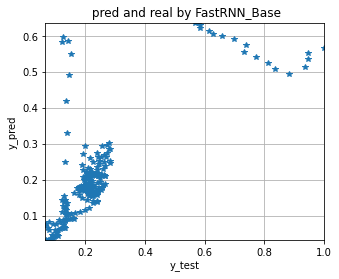

In [79]:
plt.figure(figsize=(5,4))
plt.plot(y_test,y_pred,'*')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid(axis='both',)
plt.xlim([min(y_test),max(y_test)])
plt.ylim([min(y_pred),max(y_pred)])
plt.title(' pred and real by FastRNN_Base')
plt.show()

## 12.2 FastRNN-HOA

In [112]:
x=sol_opti_HOA.copy()

In [113]:
dict_fast=dict()
dict_fast['use_layer2']      =array_use[int_round(x[0])]
dict_fast['use_layer3']      =array_use[int_round(x[1])]
dict_fast['use_batchnorm']   =array_use[int_round(x[2])]
dict_fast['units1']          =array_units_rnn[int_round(x[3])]
dict_fast['active1']         =array_active[int_round(x[4])]
dict_fast['alpha1']    =np.round(x[5],4)
dict_fast['beta1']     =np.round(x[6],4)
dict_fast['units2']    =array_units_rnn[int_round(x[7])]
dict_fast['active2']   =array_active[int_round(x[8])]
dict_fast['alpha2']    =np.round(x[9],4)
dict_fast['beta2']     =np.round(x[10],4)
dict_fast['units3']    =array_units_rnn[int_round(x[11])]
dict_fast['active3']   =array_active[int_round(x[12])]
dict_fast['alpha3']    =np.round(x[13],4)
dict_fast['beta3']     =np.round(x[14],4)
dict_fast['dense1']    =array_units_dense[int_round(x[15])]
dict_fast['dense2']    =array_units_dense[int_round(x[16])]
dict_fast['drop']      =array_drop[int_round(x[17])]

print("_"*100)

for key, value in dict_fast.items():
    # print(".."*20)
    print(key,':',value)
print("_"*100)


____________________________________________________________________________________________________
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 8
active1 : sigmoid
alpha1 : 0.0
beta1 : 0.7805
units2 : 4
active2 : tanh
alpha2 : 0.0
beta2 : 0.0
units3 : 8
active3 : tanh
alpha3 : 0.0
beta3 : 0.0
dense1 : 1
dense2 : 8
drop : 0.0
____________________________________________________________________________________________________


In [114]:
FastRNN_HOA=ceate_fast_rnn(X_train,dict_fast)
FastRNN_HOA.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 25)]           0         
                                                                 
 fastRNN_1 (RNN)             (None, 7, 8)              538       
                                                                 
 global_max_pooling1d_6 (Glo  (None, 8)                0         
 balMaxPooling1D)                                                
                                                                 
 dense_20 (Dense)            (None, 1)                 9         
                                                                 
 dense_21 (Dense)            (None, 8)                 16        
                                                                 
 dropout_11 (Dropout)        (None, 8)                 0         
                                                           

In [83]:
# fitness(x)

In [84]:
hist_model_FastRNN_HOA=FastRNN_HOA.fit(x=X_train, y=y_train,
                validation_data=(X_test,y_test),
                epochs=100,shuffle=True,
               batch_size=32)

Epoch 1/100
64/64 [==============================] - 2s 8ms/step - loss: 0.1404 - val_loss: 0.0505
Epoch 2/100
64/64 [==============================] - 0s 5ms/step - loss: 0.0315 - val_loss: 0.0389
Epoch 3/100
64/64 [==============================] - 0s 5ms/step - loss: 0.0224 - val_loss: 0.0320
Epoch 4/100
64/64 [==============================] - 0s 5ms/step - loss: 0.0177 - val_loss: 0.0286
Epoch 5/100
64/64 [==============================] - 0s 5ms/step - loss: 0.0157 - val_loss: 0.0269
Epoch 6/100
64/64 [==============================] - 0s 5ms/step - loss: 0.0148 - val_loss: 0.0256
Epoch 7/100
64/64 [==============================] - 0s 5ms/step - loss: 0.0141 - val_loss: 0.0250
Epoch 8/100
64/64 [==============================] - 0s 5ms/step - loss: 0.0134 - val_loss: 0.0245
Epoch 9/100
64/64 [==============================] - 0s 5ms/step - loss: 0.0126 - val_loss: 0.0239
Epoch 10/100
64/64 [==============================] - 0s 6ms/step - loss: 0.0116 - val_loss: 0.0232
Epoch 11/

Epoch 81/100
64/64 [==============================] - 0s 5ms/step - loss: 4.5871e-04 - val_loss: 0.0085
Epoch 82/100
64/64 [==============================] - 0s 4ms/step - loss: 4.6394e-04 - val_loss: 0.0085
Epoch 83/100
64/64 [==============================] - 0s 4ms/step - loss: 4.6587e-04 - val_loss: 0.0085
Epoch 84/100
64/64 [==============================] - 0s 5ms/step - loss: 4.7063e-04 - val_loss: 0.0085
Epoch 85/100
64/64 [==============================] - 0s 5ms/step - loss: 4.5833e-04 - val_loss: 0.0085
Epoch 86/100
64/64 [==============================] - 0s 5ms/step - loss: 4.5603e-04 - val_loss: 0.0085
Epoch 87/100
64/64 [==============================] - 0s 5ms/step - loss: 4.6452e-04 - val_loss: 0.0084
Epoch 88/100
64/64 [==============================] - 0s 5ms/step - loss: 4.5236e-04 - val_loss: 0.0085
Epoch 89/100
64/64 [==============================] - 0s 5ms/step - loss: 4.5835e-04 - val_loss: 0.0085
Epoch 90/100
64/64 [==============================] - 0s 4ms/ste

In [100]:
from sklearn import metrics
y_pred=FastRNN_HOA.predict(X_test,verbose=0)

mse=metrics.mean_squared_error(y_test, y_pred)
rmse= math.sqrt(mse) 
mae=metrics.mean_absolute_error(y_test,y_pred) 
mape=metrics.mean_absolute_percentage_error(y_test,y_pred) 
r2= metrics.r2_score(y_test, y_pred)
#----save to table --------
myTable.append(['FastRNN_HOA',
                 np.round(mse,4),
                 np.round(rmse,4),
                 np.round(mae,4),
                 np.round(r2,4),
                 np.round(mape,4)
                  ])
print(myTable)



[['FastRNN_Base', 0.0115, 0.1071, 0.0601, 0.5818, 0.2918], ['FastRNN_HOA', 0.0084, 0.0915, 0.0474, 0.6946, 0.2223]]


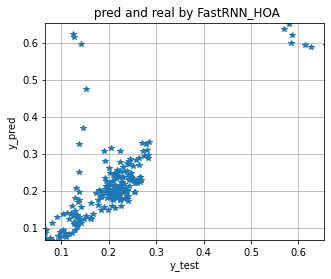

In [87]:
plt.figure(figsize=(5,4))
plt.plot(y_test,y_pred,'*')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid(axis='both',)
plt.xlim([min(y_test),max(y_pred)])
plt.ylim([min(y_test),max(y_pred)])
plt.title(' pred and real by FastRNN_HOA')
plt.show()

## 12.3 FastRNN-SHO

In [115]:
x=best_sol_SHO.copy()

In [116]:
dict_fast=dict()
dict_fast['use_layer2']      =array_use[int_round(x[0])]
dict_fast['use_layer3']      =array_use[int_round(x[1])]
dict_fast['use_batchnorm']   =array_use[int_round(x[2])]
dict_fast['units1']          =array_units_rnn[int_round(x[3])]
dict_fast['active1']         =array_active[int_round(x[4])]
dict_fast['alpha1']    =np.round(x[5],4)
dict_fast['beta1']     =np.round(x[6],4)
dict_fast['units2']    =array_units_rnn[int_round(x[7])]
dict_fast['active2']   =array_active[int_round(x[8])]
dict_fast['alpha2']    =np.round(x[9],4)
dict_fast['beta2']     =np.round(x[10],4)
dict_fast['units3']    =array_units_rnn[int_round(x[11])]
dict_fast['active3']   =array_active[int_round(x[12])]
dict_fast['alpha3']    =np.round(x[13],4)
dict_fast['beta3']     =np.round(x[14],4)
dict_fast['dense1']    =array_units_dense[int_round(x[15])]
dict_fast['dense2']    =array_units_dense[int_round(x[16])]
dict_fast['drop']      =array_drop[int_round(x[17])]

print("_"*100)

for key, value in dict_fast.items():
    # print(".."*20)
    print(key,':',value)
print("_"*100)


____________________________________________________________________________________________________
use_layer2 : False
use_layer3 : False
use_batchnorm : False
units1 : 8
active1 : relu
alpha1 : -1.1779
beta1 : 0.4607
units2 : 16
active2 : tanh
alpha2 : -3.1927
beta2 : 2.1562
units3 : 8
active3 : sigmoid
alpha3 : -1.5241
beta3 : 2.6823
dense1 : 64
dense2 : 512
drop : 0.18
____________________________________________________________________________________________________


In [117]:
FastRNN_SHO=ceate_fast_rnn(X_train,dict_fast)
FastRNN_SHO.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7, 25)]           0         
                                                                 
 fastRNN_1 (RNN)             (None, 7, 8)              538       
                                                                 
 global_max_pooling1d_7 (Glo  (None, 8)                0         
 balMaxPooling1D)                                                
                                                                 
 dense_23 (Dense)            (None, 64)                576       
                                                                 
 dense_24 (Dense)            (None, 512)               33280     
                                                                 
 dropout_12 (Dropout)        (None, 512)               0         
                                                           

In [92]:
hist_model_FastRNN_SHO=FastRNN_SHO.fit(x=X_train, y=y_train,
                validation_data=(X_test,y_test),
                epochs=100,shuffle=True,
               batch_size=32)

Epoch 1/100
64/64 [==============================] - 2s 8ms/step - loss: 0.0154 - val_loss: 0.0163
Epoch 2/100
64/64 [==============================] - 0s 5ms/step - loss: 0.0018 - val_loss: 0.0216
Epoch 3/100
64/64 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0242
Epoch 4/100
64/64 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0289
Epoch 5/100
64/64 [==============================] - 0s 5ms/step - loss: 8.2940e-04 - val_loss: 0.0309
Epoch 6/100
64/64 [==============================] - 0s 5ms/step - loss: 8.4683e-04 - val_loss: 0.0305
Epoch 7/100
64/64 [==============================] - 0s 6ms/step - loss: 7.4513e-04 - val_loss: 0.0404
Epoch 8/100
64/64 [==============================] - 0s 5ms/step - loss: 6.6325e-04 - val_loss: 0.0281
Epoch 9/100
64/64 [==============================] - 0s 6ms/step - loss: 6.3069e-04 - val_loss: 0.0231
Epoch 10/100
64/64 [==============================] - 0s 6ms/step - loss: 6.1706e-04 - va

64/64 [==============================] - 0s 5ms/step - loss: 4.5138e-04 - val_loss: 0.0107
Epoch 81/100
64/64 [==============================] - 0s 6ms/step - loss: 4.7085e-04 - val_loss: 0.0100
Epoch 82/100
64/64 [==============================] - 0s 6ms/step - loss: 4.4891e-04 - val_loss: 0.0098
Epoch 83/100
64/64 [==============================] - 0s 6ms/step - loss: 4.8200e-04 - val_loss: 0.0109
Epoch 84/100
64/64 [==============================] - 0s 6ms/step - loss: 4.5596e-04 - val_loss: 0.0111
Epoch 85/100
64/64 [==============================] - 0s 5ms/step - loss: 4.9888e-04 - val_loss: 0.0097
Epoch 86/100
64/64 [==============================] - 0s 5ms/step - loss: 4.5612e-04 - val_loss: 0.0090
Epoch 87/100
64/64 [==============================] - 0s 5ms/step - loss: 4.8774e-04 - val_loss: 0.0096
Epoch 88/100
64/64 [==============================] - 0s 5ms/step - loss: 4.6224e-04 - val_loss: 0.0094
Epoch 89/100
64/64 [==============================] - 0s 5ms/step - loss: 4.5

In [101]:
from sklearn import metrics
y_pred=FastRNN_SHO.predict(X_test,verbose=0)

mse=metrics.mean_squared_error(y_test, y_pred)
rmse= math.sqrt(mse) 
mae=metrics.mean_absolute_error(y_test,y_pred) 
mape=metrics.mean_absolute_percentage_error(y_test,y_pred) 
r2= metrics.r2_score(y_test, y_pred)
#----save to table --------
myTable.append(['FastRNN_SHO',
                 np.round(mse,4),
                 np.round(rmse,4),
                 np.round(mae,4),
                 np.round(r2,4),
                 np.round(mape,4)
                  ])
print(myTable)


[['FastRNN_Base', 0.0115, 0.1071, 0.0601, 0.5818, 0.2918], ['FastRNN_HOA', 0.0084, 0.0915, 0.0474, 0.6946, 0.2223], ['FastRNN_SHO', 0.0087, 0.0935, 0.0472, 0.681, 0.2298]]


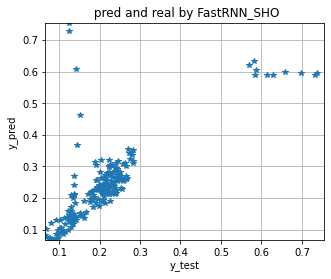

In [102]:
plt.figure(figsize=(5,4))
plt.plot(y_test,y_pred,'*')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid(axis='both',)
plt.xlim([min(y_test),max(y_pred)])
plt.ylim([min(y_test),max(y_pred)])
plt.title(' pred and real by FastRNN_SHO')
plt.show()

## 12.4 GAN_Base

In [103]:
EPOCHS = 1000

In [104]:
data_gen_train, data_gen_test = get_gen_train_test(data_normal)

generator = make_generator_model()
discriminator=make_discriminator_model()

learning_rate=1e-4
generator_optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.5)

@tf.function
def train_step(sequences, sequences_end):
  return train_step_def(sequences, sequences_end)

@tf.function
def test_step(sequences, sequences_end):
  return test_step_def(sequences, sequences_end)







Time for epoch 1  Generator Loss: 0.6893709301948547,  Discriminator_loss: 1.3838156461715698
Time for epoch 2  Generator Loss: 0.6912558674812317,  Discriminator_loss: 1.3801671266555786
Time for epoch 3  Generator Loss: 0.6917001605033875,  Discriminator_loss: 1.3742481470108032
Time for epoch 4  Generator Loss: 0.6910356879234314,  Discriminator_loss: 1.3749608993530273
Time for epoch 5  Generator Loss: 0.6903156042098999,  Discriminator_loss: 1.3737815618515015
Time for epoch 6  Generator Loss: 0.6910785436630249,  Discriminator_loss: 1.3800326585769653
Time for epoch 7  Generator Loss: 0.6949546337127686,  Discriminator_loss: 1.374802589416504
Time for epoch 8  Generator Loss: 0.6988148093223572,  Discriminator_loss: 1.3766881227493286
Time for epoch 9  Generator Loss: 0.69945228099823,  Discriminator_loss: 1.3762363195419312
Time for epoch 10  Generator Loss: 0.6961987018585205,  Discriminator_loss: 1.3745020627975464
Time for epoch 11  Generator Loss: 0.6999180912971497,  Discri

Time for epoch 88  Generator Loss: 0.7077708840370178,  Discriminator_loss: 1.3742233514785767
Time for epoch 89  Generator Loss: 0.7009473443031311,  Discriminator_loss: 1.3803191184997559
Time for epoch 90  Generator Loss: 0.7065787315368652,  Discriminator_loss: 1.370315432548523
Time for epoch 91  Generator Loss: 0.7065122723579407,  Discriminator_loss: 1.3732194900512695
Time for epoch 92  Generator Loss: 0.7044865489006042,  Discriminator_loss: 1.3734287023544312
Time for epoch 93  Generator Loss: 0.7012349367141724,  Discriminator_loss: 1.382919192314148
Time for epoch 94  Generator Loss: 0.7042674422264099,  Discriminator_loss: 1.3738003969192505
Time for epoch 95  Generator Loss: 0.7027325630187988,  Discriminator_loss: 1.3746405839920044
Time for epoch 96  Generator Loss: 0.7044749855995178,  Discriminator_loss: 1.3762774467468262
Time for epoch 97  Generator Loss: 0.6990651488304138,  Discriminator_loss: 1.3778588771820068
Time for epoch 98  Generator Loss: 0.699955821037292

Time for epoch 174  Generator Loss: 0.693347156047821,  Discriminator_loss: 1.380201816558838
Time for epoch 175  Generator Loss: 0.6965864300727844,  Discriminator_loss: 1.3768757581710815
Time for epoch 176  Generator Loss: 0.698194146156311,  Discriminator_loss: 1.3780996799468994
Time for epoch 177  Generator Loss: 0.6944443583488464,  Discriminator_loss: 1.3795222043991089
Time for epoch 178  Generator Loss: 0.691836416721344,  Discriminator_loss: 1.385448694229126
Time for epoch 179  Generator Loss: 0.69127357006073,  Discriminator_loss: 1.3817505836486816
Time for epoch 180  Generator Loss: 0.6931118965148926,  Discriminator_loss: 1.3835569620132446
Time for epoch 181  Generator Loss: 0.6898965835571289,  Discriminator_loss: 1.3869661092758179
Time for epoch 182  Generator Loss: 0.6932089328765869,  Discriminator_loss: 1.3816413879394531
Time for epoch 183  Generator Loss: 0.6925989985466003,  Discriminator_loss: 1.381809949874878
Time for epoch 184  Generator Loss: 0.6941486001

Time for epoch 260  Generator Loss: 0.6909864544868469,  Discriminator_loss: 1.384400725364685
Time for epoch 261  Generator Loss: 0.6933929324150085,  Discriminator_loss: 1.38060462474823
Time for epoch 262  Generator Loss: 0.6928898692131042,  Discriminator_loss: 1.380204439163208
Time for epoch 263  Generator Loss: 0.6913522481918335,  Discriminator_loss: 1.3827922344207764
Time for epoch 264  Generator Loss: 0.6909230351448059,  Discriminator_loss: 1.3827112913131714
Time for epoch 265  Generator Loss: 0.6951895356178284,  Discriminator_loss: 1.3787236213684082
Time for epoch 266  Generator Loss: 0.689281702041626,  Discriminator_loss: 1.386096477508545
Time for epoch 267  Generator Loss: 0.692695140838623,  Discriminator_loss: 1.3829792737960815
Time for epoch 268  Generator Loss: 0.6903029084205627,  Discriminator_loss: 1.38483464717865
Time for epoch 269  Generator Loss: 0.6915062069892883,  Discriminator_loss: 1.3842713832855225
Time for epoch 270  Generator Loss: 0.68929135799

Time for epoch 346  Generator Loss: 0.6938086748123169,  Discriminator_loss: 1.384006142616272
Time for epoch 347  Generator Loss: 0.6956737041473389,  Discriminator_loss: 1.381176233291626
Time for epoch 348  Generator Loss: 0.6914748549461365,  Discriminator_loss: 1.3841341733932495
Time for epoch 349  Generator Loss: 0.6933972835540771,  Discriminator_loss: 1.3823233842849731
Time for epoch 350  Generator Loss: 0.6928841471672058,  Discriminator_loss: 1.383463978767395
Time for epoch 351  Generator Loss: 0.6932632923126221,  Discriminator_loss: 1.3818691968917847
Time for epoch 352  Generator Loss: 0.6932187080383301,  Discriminator_loss: 1.3800348043441772
Time for epoch 353  Generator Loss: 0.6940213441848755,  Discriminator_loss: 1.377232313156128
Time for epoch 354  Generator Loss: 0.6929863095283508,  Discriminator_loss: 1.3820512294769287
Time for epoch 355  Generator Loss: 0.6974236369132996,  Discriminator_loss: 1.3778343200683594
Time for epoch 356  Generator Loss: 0.696436

Time for epoch 432  Generator Loss: 0.693621814250946,  Discriminator_loss: 1.3830289840698242
Time for epoch 433  Generator Loss: 0.6969528198242188,  Discriminator_loss: 1.3807404041290283
Time for epoch 434  Generator Loss: 0.7002792954444885,  Discriminator_loss: 1.3779232501983643
Time for epoch 435  Generator Loss: 0.6948084235191345,  Discriminator_loss: 1.3804770708084106
Time for epoch 436  Generator Loss: 0.6961612105369568,  Discriminator_loss: 1.3801604509353638
Time for epoch 437  Generator Loss: 0.6971578598022461,  Discriminator_loss: 1.3807034492492676
Time for epoch 438  Generator Loss: 0.6965280771255493,  Discriminator_loss: 1.376496434211731
Time for epoch 439  Generator Loss: 0.6974485516548157,  Discriminator_loss: 1.378089189529419
Time for epoch 440  Generator Loss: 0.6976911425590515,  Discriminator_loss: 1.3777962923049927
Time for epoch 441  Generator Loss: 0.6940398812294006,  Discriminator_loss: 1.3806159496307373
Time for epoch 442  Generator Loss: 0.70401

Time for epoch 518  Generator Loss: 0.6965469121932983,  Discriminator_loss: 1.3751474618911743
Time for epoch 519  Generator Loss: 0.6972060203552246,  Discriminator_loss: 1.3775914907455444
Time for epoch 520  Generator Loss: 0.6999620199203491,  Discriminator_loss: 1.3783327341079712
Time for epoch 521  Generator Loss: 0.6995526552200317,  Discriminator_loss: 1.3744572401046753
Time for epoch 522  Generator Loss: 0.7023488879203796,  Discriminator_loss: 1.371817946434021
Time for epoch 523  Generator Loss: 0.696419358253479,  Discriminator_loss: 1.3787856101989746
Time for epoch 524  Generator Loss: 0.7034775018692017,  Discriminator_loss: 1.3702685832977295
Time for epoch 525  Generator Loss: 0.6959605813026428,  Discriminator_loss: 1.3811970949172974
Time for epoch 526  Generator Loss: 0.7001186013221741,  Discriminator_loss: 1.3764861822128296
Time for epoch 527  Generator Loss: 0.6993404030799866,  Discriminator_loss: 1.3777704238891602
Time for epoch 528  Generator Loss: 0.6967

Time for epoch 604  Generator Loss: 0.7002009153366089,  Discriminator_loss: 1.3778655529022217
Time for epoch 605  Generator Loss: 0.7010420560836792,  Discriminator_loss: 1.3753200769424438
Time for epoch 606  Generator Loss: 0.7048003077507019,  Discriminator_loss: 1.3729809522628784
Time for epoch 607  Generator Loss: 0.7023007273674011,  Discriminator_loss: 1.3740311861038208
Time for epoch 608  Generator Loss: 0.7026298642158508,  Discriminator_loss: 1.3729350566864014
Time for epoch 609  Generator Loss: 0.7054696083068848,  Discriminator_loss: 1.37167489528656
Time for epoch 610  Generator Loss: 0.7109732031822205,  Discriminator_loss: 1.3682258129119873
Time for epoch 611  Generator Loss: 0.7030129432678223,  Discriminator_loss: 1.3718388080596924
Time for epoch 612  Generator Loss: 0.7066811323165894,  Discriminator_loss: 1.365728735923767
Time for epoch 613  Generator Loss: 0.7036911249160767,  Discriminator_loss: 1.3766191005706787
Time for epoch 614  Generator Loss: 0.69758

Time for epoch 690  Generator Loss: 0.7159609794616699,  Discriminator_loss: 1.3635601997375488
Time for epoch 691  Generator Loss: 0.7087456583976746,  Discriminator_loss: 1.373241662979126
Time for epoch 692  Generator Loss: 0.7165711522102356,  Discriminator_loss: 1.3595714569091797
Time for epoch 693  Generator Loss: 0.7118021249771118,  Discriminator_loss: 1.3659231662750244
Time for epoch 694  Generator Loss: 0.7131094932556152,  Discriminator_loss: 1.363092064857483
Time for epoch 695  Generator Loss: 0.7042196393013,  Discriminator_loss: 1.3699212074279785
Time for epoch 696  Generator Loss: 0.7147843241691589,  Discriminator_loss: 1.3674111366271973
Time for epoch 697  Generator Loss: 0.7186047434806824,  Discriminator_loss: 1.3619053363800049
Time for epoch 698  Generator Loss: 0.7152093648910522,  Discriminator_loss: 1.3646281957626343
Time for epoch 699  Generator Loss: 0.715354859828949,  Discriminator_loss: 1.3682090044021606
Time for epoch 700  Generator Loss: 0.71683663

Time for epoch 776  Generator Loss: 0.7239832878112793,  Discriminator_loss: 1.3640905618667603
Time for epoch 777  Generator Loss: 0.7231274843215942,  Discriminator_loss: 1.35769784450531
Time for epoch 778  Generator Loss: 0.7195804119110107,  Discriminator_loss: 1.3683667182922363
Time for epoch 779  Generator Loss: 0.7239789962768555,  Discriminator_loss: 1.3623425960540771
Time for epoch 780  Generator Loss: 0.7317811846733093,  Discriminator_loss: 1.359273910522461
Time for epoch 781  Generator Loss: 0.7069572806358337,  Discriminator_loss: 1.371917963027954
Time for epoch 782  Generator Loss: 0.7365654706954956,  Discriminator_loss: 1.3492902517318726
Time for epoch 783  Generator Loss: 0.7126833200454712,  Discriminator_loss: 1.3624199628829956
Time for epoch 784  Generator Loss: 0.7263813018798828,  Discriminator_loss: 1.3593168258666992
Time for epoch 785  Generator Loss: 0.7083413600921631,  Discriminator_loss: 1.3710594177246094
Time for epoch 786  Generator Loss: 0.717352

Time for epoch 862  Generator Loss: 0.7434995174407959,  Discriminator_loss: 1.3559942245483398
Time for epoch 863  Generator Loss: 0.7288479804992676,  Discriminator_loss: 1.3650915622711182
Time for epoch 864  Generator Loss: 0.7200421690940857,  Discriminator_loss: 1.3661221265792847
Time for epoch 865  Generator Loss: 0.7199276685714722,  Discriminator_loss: 1.3677226305007935
Time for epoch 866  Generator Loss: 0.74962317943573,  Discriminator_loss: 1.3429996967315674
Time for epoch 867  Generator Loss: 0.7202783226966858,  Discriminator_loss: 1.360568642616272
Time for epoch 868  Generator Loss: 0.741074800491333,  Discriminator_loss: 1.350332498550415
Time for epoch 869  Generator Loss: 0.7366278171539307,  Discriminator_loss: 1.355600357055664
Time for epoch 870  Generator Loss: 0.7222444415092468,  Discriminator_loss: 1.3663041591644287
Time for epoch 871  Generator Loss: 0.7445590496063232,  Discriminator_loss: 1.3473678827285767
Time for epoch 872  Generator Loss: 0.72830790

Time for epoch 948  Generator Loss: 0.7496708631515503,  Discriminator_loss: 1.34677255153656
Time for epoch 949  Generator Loss: 0.7611037492752075,  Discriminator_loss: 1.3382490873336792
Time for epoch 950  Generator Loss: 0.7633689045906067,  Discriminator_loss: 1.3476918935775757
Time for epoch 951  Generator Loss: 0.7777478694915771,  Discriminator_loss: 1.3261816501617432
Time for epoch 952  Generator Loss: 0.7408685684204102,  Discriminator_loss: 1.3500971794128418
Time for epoch 953  Generator Loss: 0.7372397184371948,  Discriminator_loss: 1.3516439199447632
Time for epoch 954  Generator Loss: 0.7840999364852905,  Discriminator_loss: 1.3362196683883667
Time for epoch 955  Generator Loss: 0.7764427661895752,  Discriminator_loss: 1.3331689834594727
Time for epoch 956  Generator Loss: 0.7646529674530029,  Discriminator_loss: 1.3381571769714355
Time for epoch 957  Generator Loss: 0.7667483687400818,  Discriminator_loss: 1.3357634544372559
Time for epoch 958  Generator Loss: 0.7774

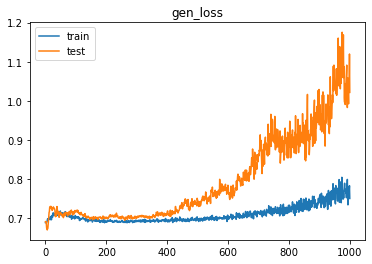

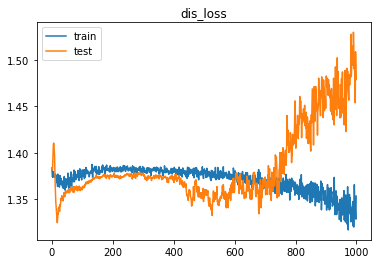

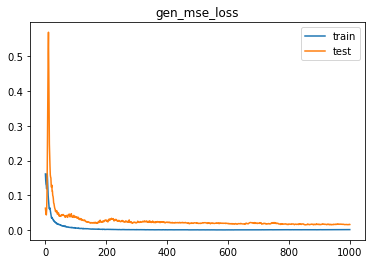

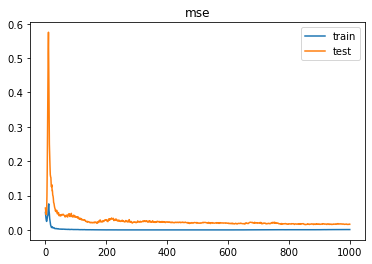

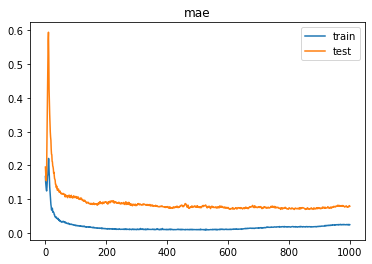

In [105]:
history, history_val = train(data_gen_train, data_gen_test, EPOCHS)
plot_history(history, history_val)


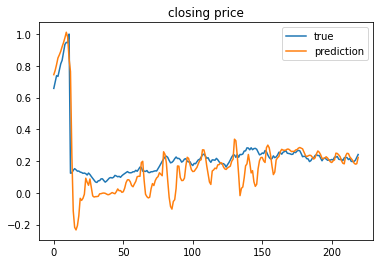

In [106]:
y_pred=[]
y_true=[]
for i in range(len(data_gen_test)):
  sequence, target = data_gen_test[i]
  y_pred .extend(generator.predict(sequence)[...,idx_col_GAN].tolist())
  y_true .extend(target[...,idx_col_GAN].tolist())

plt.figure()
plt.title("closing price")
plt.plot(y_true, label="true")
plt.plot(y_pred, label="prediction")
plt.legend()
plt.show()


In [107]:
from sklearn import metrics
import math

mse=metrics.mean_squared_error(y_true, y_pred)
rmse= math.sqrt(mse) 
mae=metrics.mean_absolute_error(y_true,y_pred) 
mape=metrics.mean_absolute_percentage_error(y_true,y_pred) 
r2= metrics.r2_score(y_true, y_pred)
#----save to table --------
myTable.append(['GAN_Base',
                 np.round(mse,4),
                 np.round(rmse,4),
                 np.round(mae,4),
                 np.round(r2,4),
                 np.round(mape,4)
                  ])
print(myTable)





[['FastRNN_Base', 0.0115, 0.1071, 0.0601, 0.5818, 0.2918], ['FastRNN_HOA', 0.0084, 0.0915, 0.0474, 0.6946, 0.2223], ['FastRNN_SHO', 0.0087, 0.0935, 0.0472, 0.681, 0.2298], ['GAN_Base', 0.0121, 0.1099, 0.0749, 0.5082, 0.4605]]


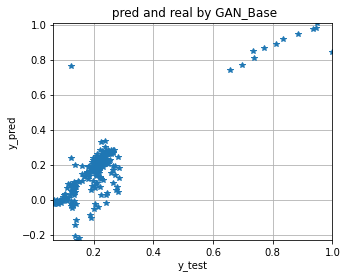

In [108]:
plt.figure(figsize=(5,4))
plt.plot(y_true,y_pred,'*')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.grid(axis='both',)
plt.xlim([min(y_true),max(y_true)])
plt.ylim([min(y_pred),max(y_pred)])
plt.title(' pred and real by GAN_Base')
plt.show()

In [109]:
y_pred_GAN=y_pred

# **13. Final Result**

In [110]:
myTable=np.array(myTable)
print(myTable)

[['FastRNN_Base' '0.0115' '0.1071' '0.0601' '0.5818' '0.2918']
 ['FastRNN_HOA' '0.0084' '0.0915' '0.0474' '0.6946' '0.2223']
 ['FastRNN_SHO' '0.0087' '0.0935' '0.0472' '0.681' '0.2298']
 ['GAN_Base' '0.0121' '0.1099' '0.0749' '0.5082' '0.4605']]


In [111]:

data_res=pd.DataFrame(myTable,columns=["algorithm_name","MSE","RMSE","MAE","R2","MAPE"])
data_res=data_res[["algorithm_name","MSE","RMSE","MAE","MAPE","R2"]]
data_res[["MSE","RMSE","MAE","MAPE","R2"]]=data_res[["MSE","RMSE","MAE","MAPE","R2"]].astype(float)
data_res

,algorithm_name,MSE,RMSE,MAE,MAPE,R2
0,FastRNN_Base,0.0115,0.1071,0.0601,0.2918,0.5818
1,FastRNN_HOA,0.0084,0.0915,0.0474,0.2223,0.6946
2,FastRNN_SHO,0.0087,0.0935,0.0472,0.2298,0.6810
3,GAN_Base,0.0121,0.1099,0.0749,0.4605,0.5082


In [112]:
data_res.to_excel('out_3.xlsx')

In [113]:
# tbl_as_csv = myTable.get_csv_string().replace('\r','')
# text_file = open("output_all.csv", "w")
# n = text_file.write(tbl_as_csv)
# text_file.close()
# data_res_metric=pd.read_csv("output_all.csv")
# data_res_metric

In [114]:
y_pred_GAN=y_test[0:len(y_test)-len(y_pred)].reshape(-1).tolist()

In [115]:
y_pred_GAN.extend(y_pred)
y_pred_SHO=FastRNN_SHO.predict(X_test,verbose=0)
y_pred_HOA=FastRNN_HOA.predict(X_test,verbose=0)
y_pred_RNN=model_FastRNN_Base.predict(X_test,verbose=0)

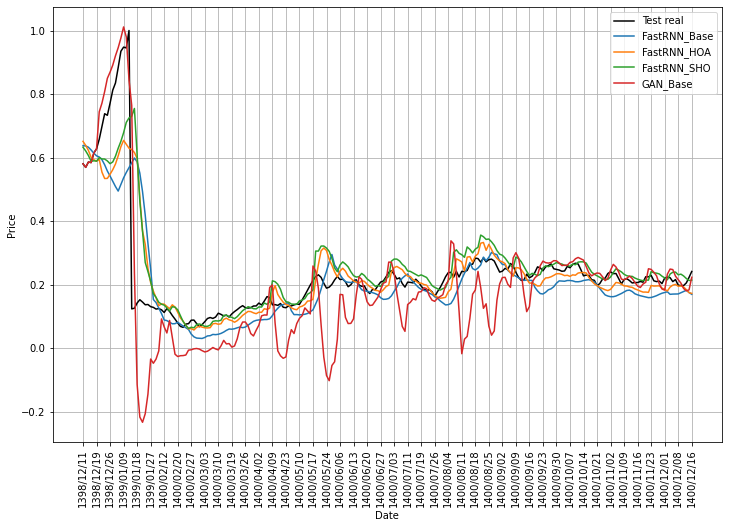

In [116]:
plt.figure(figsize=(12,8))
plt.plot(y_test,'k-',label='Test real')
plt.plot(y_pred_RNN,label='FastRNN_Base')
plt.plot(y_pred_HOA,label='FastRNN_HOA')
plt.plot(y_pred_SHO,label='FastRNN_SHO')
plt.plot(y_pred_GAN,label='GAN_Base')
idx=range(len(y_train),len(y_train)+len(y_test),5)
plt.xticks(range(0,len(y_test),5),data_main['تاریخ شمسی'].values[idx],rotation=90)
plt.ylabel('Price')
plt.xlabel('Date')
plt.grid(axis='both')
plt.legend()
plt.savefig('out1_final.png')
plt.show()


In [117]:
import pickle
filename = 'fastrnn_3.pkl'
pickle.dump(model_FastRNN_Base, open(filename, 'wb'))

filename = 'FastRNN_SHO_3.pkl'
pickle.dump(FastRNN_SHO, open(filename, 'wb'))

filename = 'FastRNN_HOA_3.pkl'
pickle.dump(FastRNN_HOA, open(filename, 'wb'))

filename = 'GAN_Base_3.pkl'
pickle.dump(generator, open(filename, 'wb'))